In [1]:
import sys
sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot ,starmodels
from astronn import models

import tensorflow as tf
from tensorflow import keras

import numpy as np
import math
import pandas as pd
import shap
from scipy.signal import find_peaks, peak_widths
import pickle

import matplotlib.pyplot as plt

Using TensorFlow backend.


### Some examples of star models

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

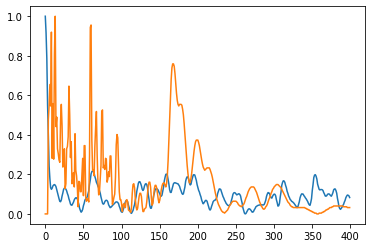

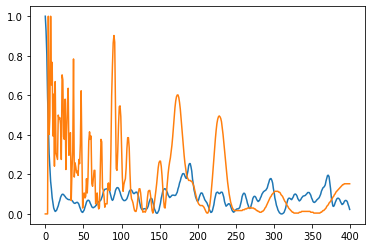

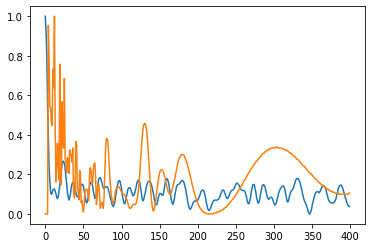

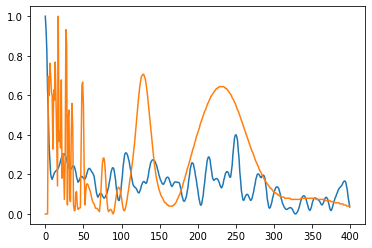

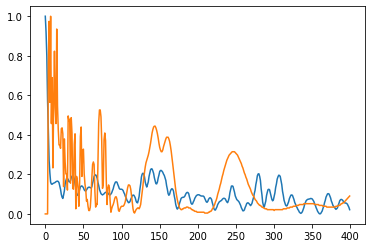

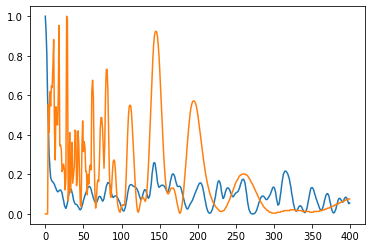

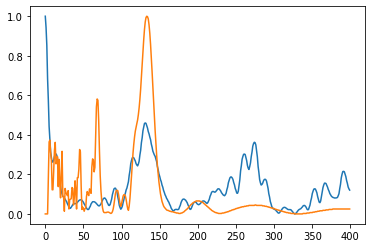

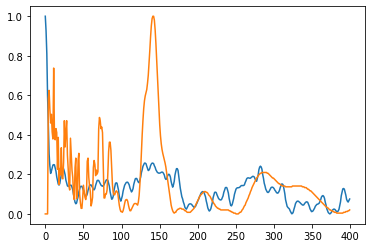

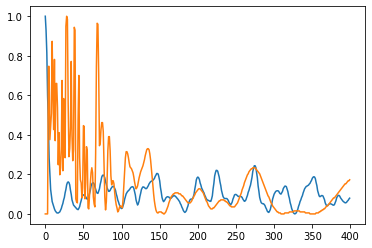

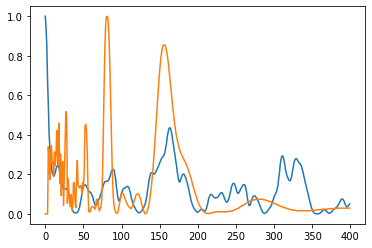

In [2]:
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)
for star in df_bedding.take(10):
    #print(np.where(star[1]==1))
    plt.plot(star[1][0, :, 0])
    plt.plot(star[1][0, :, 1])
    #plt.plot(star[1][0, :, 2], alpha=0.5)
    plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

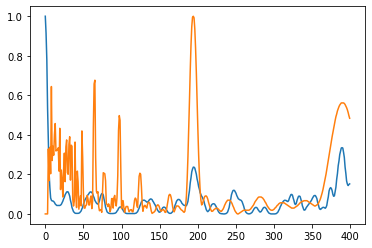

(array([0]), array([66]))


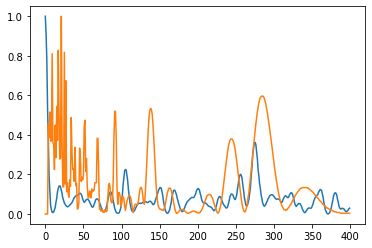

(array([0]), array([55]))


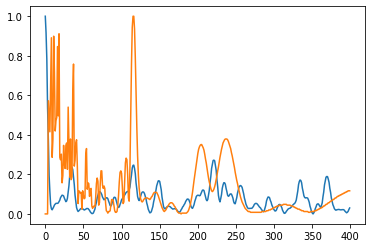

(array([0]), array([35]))


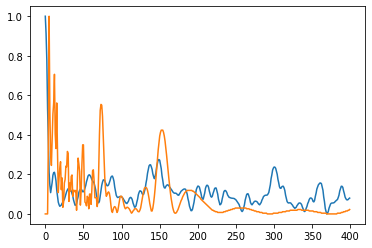

(array([0]), array([84]))


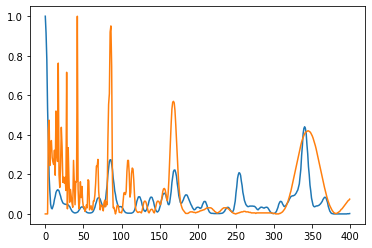

(array([0]), array([57]))


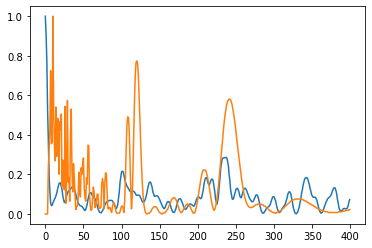

(array([0]), array([72]))


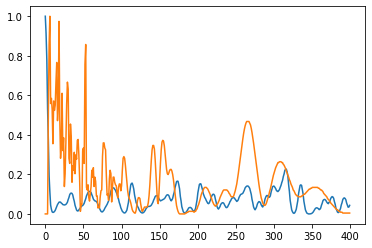

(array([0]), array([24]))


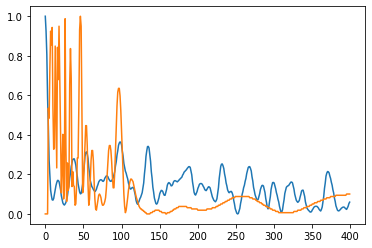

(array([0]), array([56]))


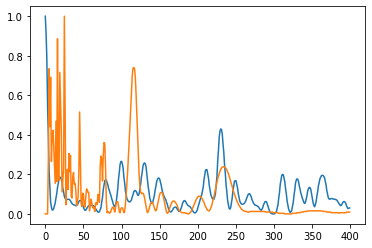

(array([0]), array([66]))


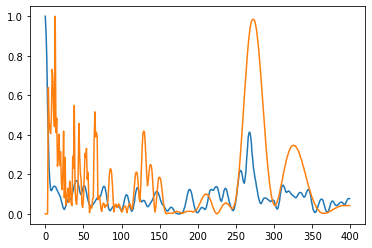

In [3]:
#df = starmodels().load("/home/roberto/Downloads/dataall_parts/parts_train/*", batch_size=1, add_noise=False)
df = starmodels().load("/home/roberto/Downloads/evolutionTracks_line/parts_train/*", batch_size=1, add_noise=False)
for star in df.take(10):
    #print(star[0])
    print(np.where(star[1]==1))
    plt.plot(star[0][0, :, 0])
    plt.plot(star[0][0, :, 1])
    #plt.plot(star[0][0, :, 2], alpha=0.5)
    plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

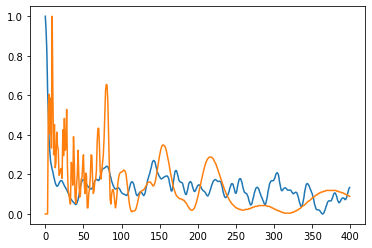

tf.Tensor([b'HD172189'], shape=(1,), dtype=string)


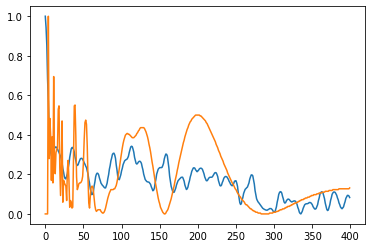

tf.Tensor([b'KIC8262223'], shape=(1,), dtype=string)


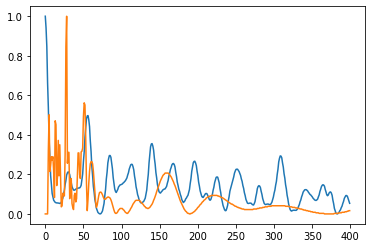

tf.Tensor([b'KIC3858884'], shape=(1,), dtype=string)


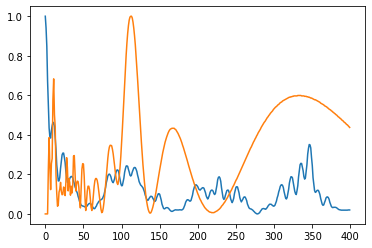

tf.Tensor([b'KIC9851944'], shape=(1,), dtype=string)


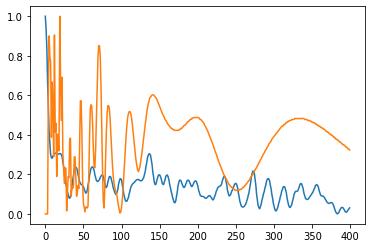

tf.Tensor([b'kic10661783'], shape=(1,), dtype=string)


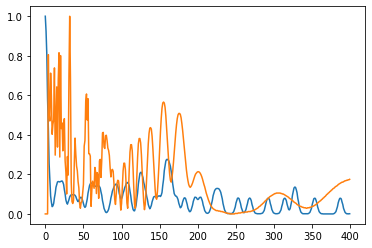

tf.Tensor([b'CID105906206'], shape=(1,), dtype=string)


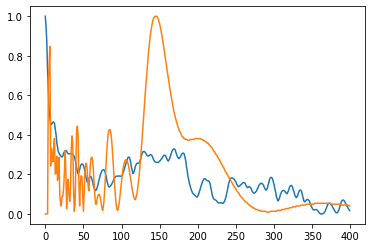

tf.Tensor([b'KIC10080943'], shape=(1,), dtype=string)


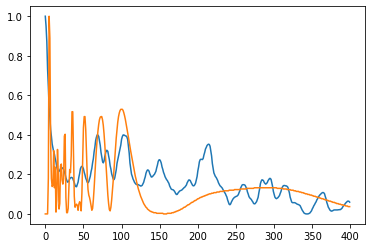

tf.Tensor([b'CID100866999'], shape=(1,), dtype=string)


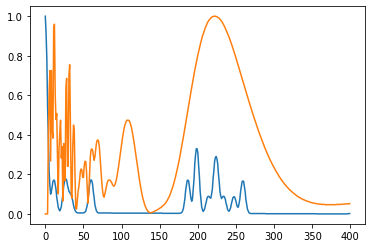

tf.Tensor([b'HD15082'], shape=(1,), dtype=string)


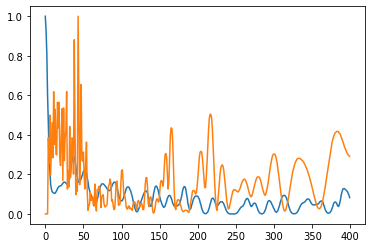

In [4]:
df_ds = deltascuti()
df_start = df_ds.load("../../astronn/data/deltascuti/preprocessed/*", batch_size=1)
for star in df_start.take(10):
    #print(np.where(star[1]==1))
    print(star[0])
    plt.plot(star[1][0, :, 0])
    plt.plot(star[1][0, :, 1])
    #plt.plot(star[1][0, :, 2], alpha=0.5)
    plt.show()

#### Calculate means and sd from data

Models- mean:0.071186 sd:0.183767
-----------------------------------------------------------------------------
11BS  - mean:0.139196 sd:0.211522
Bedd  - mean:0.106443 sd:0.196719


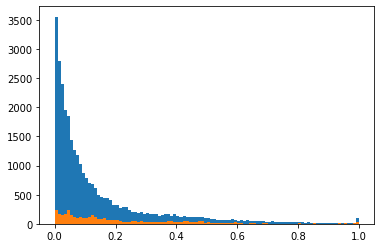

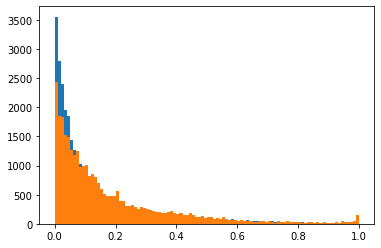

In [5]:
star_ac_values = [star[0][0, :, 1].numpy() for star in df.take(77)]
print("Models- mean:%f sd:%f" % (np.median(star_ac_values), np.std(star_ac_values)))
print("-----------------------------------------------------------------------------")
bs_ac_values = [star[1][0, :, 1] for star in df_start.take(10)]
print("11BS  - mean:%f sd:%f" % (np.median(bs_ac_values), np.std(bs_ac_values)))
bedding_ac_values = [star[1][0, :, 1] for star in df_bedding.take(77)]
print("Bedd  - mean:%f sd:%f" % (np.median(bedding_ac_values), np.std(bedding_ac_values)))

plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
plt.hist([item for sublist in bs_ac_values for item in sublist], bins=100)
plt.show()

plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
plt.hist([item for sublist in bedding_ac_values for item in sublist], bins=100)
plt.show()

In [6]:
star_ac_values = [star[0][0, :, 0] for star in df.take(77)]
print("Models- mean:%f sd:%f" % (np.median(star_ac_values), np.std(star_ac_values)))
print("-----------------------------------------------------------------------------")
bs_ac_values = [star[1][0, :, 0] for star in df_start.take(10)]
print("11BS  - mean:%f sd:%f" % (np.median(bs_ac_values), np.std(bs_ac_values)))
bedding_ac_values = [star[1][0, :, 0] for star in df_bedding.take(77)]
print("Bedd  - mean:%f sd:%f" % (np.median(bedding_ac_values), np.std(bedding_ac_values)))

Models- mean:0.082484 sd:0.097907
-----------------------------------------------------------------------------
11BS  - mean:0.110259 sd:0.120600
Bedd  - mean:0.088235 sd:0.101023


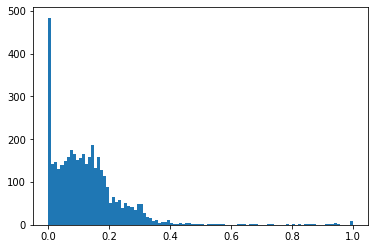

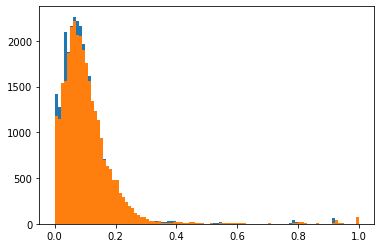

In [7]:
#### plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
plt.hist([item for sublist in bs_ac_values for item in sublist], bins=100)
plt.show()

plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
plt.hist([item for sublist in bedding_ac_values for item in sublist], bins=100)
plt.show()

### The next Period-Luminosity relation is obtained by using the data provided in McNamara (2011):

$\log_{10} \text{L}_\odot = 1.4722 (0.100) \log_{10} \text{P} + 2.6089 (0.096)$

&nbsp;
&nbsp;


### Period (variable $\text{P}$) is isolated to obtained its value given the Luminosity.

$\log_{10} \text{L}_\odot - 2.6089 (0.096) = 1.4722 (0.100) \log_{10} \text{P}$

$\log_{10} \text{P} = \Large\frac{\log_{10} \text{L}_\odot - 2.6089 (0.096)}{1.4722 (0.100)}$

$\text{P} = 10\Large^{\Large\frac{\log_{10} \text{L}_\odot - 2.6089 (0.096)}{1.4722 (0.100)}}$

&nbsp;

The fundamental radial mode $\text{P}_0$ is related to the mean density by the pulsation constant $\text{Q} = \text{P} \cdot \Large\sqrt{\frac{\rho}{\rho_\odot}}$ (see Breger, 1990). For $\text{P}_0$ the value of $\text{Q} = [0.03, 0.0492] \text{ (days)}$

Thus, by isolating $\frac{\rho}{\rho_\odot}$ in the above equation and given the value of $\text{P}$, we have a direct estimation of the mean density, as follows:

&nbsp;

$\Large\frac{\rho}{\rho_\odot} = \Big( \frac{Q}{P}\Big)^2$

In [8]:
def get_log_l(P, A=1.4722, e_A=0.1, B=2.6089, e_B=0.096):
    """
    P-L relation for McNamara (2011)
    """
    return A * np.log10(P) + B


def get_P(log_L, A=1.4722, e_A=0.1, B=2.6089, e_B=0.096):
    """
    P variable isolated from log_L relation
    """
    return np.power(10, (log_L - B) / (A))

def get_rho_from_P(P, Q=0.033):
    """
    """
    return np.power(Q/P, 2)

# Example
P = 2.34
log_l = get_log_l(P=P)
P_equation = get_P(log_L=log_l)
print("P value = %f" % P)
print("log L is equal to %f" % log_l)
print("P from equation %f" % P_equation)
# Assert results
np.testing.assert_almost_equal(P, P_equation)

P value = 2.340000
log L is equal to 3.152460
P from equation 2.340000


### Relate to the error, we use a standard error propagation to calculate it:

$\Delta P = \sqrt{\Big(\frac{\delta \text{P}}{\delta \text{A}}\Delta\text{A}\Big)^2  +  \Big(\frac{\delta \text{P}}{\delta \text{B}}\Delta\text{B}\Big)^2   +    \Big(\frac{\delta \text{P}}{\delta \text{L}}\Delta\text{L}\Big)^2}$ where $A = 1.4722$ with uncertainty $\Delta A = 0.100$ and $B = 2.6089$ with uncertainty $\Delta B = 0.096$

$\Delta P = \sqrt{ \Big( 10^{\frac{\text{L}_\odot - B}{A}}  * (2.30258509 * A^2) * \text{L}_\odot * \Delta A \Big)^2 + \Big( 10^{\frac{\text{L}_\odot - B}{A}}  * (2.30258509 * A) *  \Delta B \Big)^2}$


&nbsp;

## Range of $\rho$ used through PL relation

To calculate a valid PL window, we will use the next range:

$\Large[ \frac{\rho}{\rho_\odot}_{\min} = \Big( \frac{0.033}{P+\Delta_p}\Big)^2, \frac{\rho}{\rho_\odot}_{\max} = \Big( \frac{0.042}{P-\Delta_p}\Big)^2 \Large]$

In [9]:
def p_error(log_L, A=1.4722, e_A=0.1, B=2.6089, e_B=0.096):
    """
    """
    return np.sqrt(
        np.power(
            np.power(10, (log_L - B) / A) * (2.30258509 / np.power(A, 2)) * log_L * e_A,
            2,
        )
        + np.power(np.power(10, (log_L - B) / A) * (2.30258509 / A) * e_B, 2)
    )


l_value = 1.3
print(
    "Period for L=%f is equal to %f +-(%f)"
    % (l_value, get_P(log_L=1.3), p_error(log_L=1.3))
)

Period for L=1.300000 is equal to 0.129099 +-(0.026337)


### Relation Rodriguez-Martin et.al. 2020

$\frac{\bar{\rho}}{\rho} = 1.6^{+0.5}_{-0.4} \Big( \langle\Delta\nu\rangle / \Delta\nu_\odot \Big)^{2.02^{+0.10}_{-0.10}}$

For the moment, we will use a simetric error in the first term i.e.: $1.6^{+0.5}_{-0.5}$

$\Delta \frac{\bar{\rho}}{\rho} = \sqrt{\Big(\frac{\delta \frac{\bar{\rho}}{\rho}}{\delta \text{A}}\Delta\text{A}\Big)^2  +  \Big(\frac{\delta \frac{\bar{\rho}}{\rho}}{\delta \text{B}}\Delta\text{B}\Big)^2 }$ where $A = 1.6$ with uncertainty $\Delta A = 0.5$ and $B = 2.02$ with uncertainty $\Delta B = 0.1$

$\Delta \frac{\bar{\rho}}{\rho}  = \sqrt{ ( {\langle\Delta\nu\rangle / \Delta\nu_\odot} )^B * \Delta \text{A} )^2 +  (A * ( {\langle\Delta\nu\rangle / \Delta\nu_\odot} )^B + \log_{10}(x) * \Delta B)^2 }$


&nbsp;
&nbsp;

Inversely, we can get $\Delta \nu$ from $\rho$ as follows:

$\langle\Delta\nu\rangle / \Delta\nu_\odot = \Big( \frac{\frac{\bar{\rho}}{\rho}}{1.6^{+0.5}_{-0.4}} \Big)^{\big(2.02^{+0.10}_{-0.10} \big)^{-1}}$

$\langle\Delta\nu\rangle / \Delta\nu_\odot = \sqrt{\Big(\frac{\delta \langle\Delta\nu\rangle / \Delta\nu_\odot}{\delta \text{A}}\Delta\text{A}\Big)^2  +  \Big(\frac{\delta \langle\Delta\nu\rangle / \Delta\nu_\odot}{\delta \text{B}}\Delta\text{B}\Big)^2 }$ where $A = 1.6$ with uncertainty $\Delta A = 0.5$ and $B = 2.02$ with uncertainty $\Delta B = 0.1$

$\langle\Delta\nu\rangle / \Delta\nu_\odot = \sqrt{  -(Y * 1/(\ln(B) * Y/A) * \Delta A)^2 + (-\log(Y/A)*1/B/\ln(B)^2 * \Delta B)^2 }$



In [10]:
def get_rho(delta_nu):
    """
    """
    return 1.6 * np.power(delta_nu, 2.02)


def rho_error(delta_nu, A=1.6, e_A=0.5, B=2.02, e_B=0.1):
    """
    """
    return np.sqrt(
        np.power(np.power(delta_nu, B) * e_A, 2) 
        + np.power(A * np.power(delta_nu, B) * np.log10(delta_nu) * e_B, 2)
    )

delta_nu_value = 1.3
print(
    "Delta_nu == %f is a rho equal to %f +-(%f)"
    % (l_value, get_rho(delta_nu=delta_nu_value), rho_error(delta_nu=delta_nu_value))
)

Delta_nu == 1.300000 is a rho equal to 2.718226 +-(0.850010)


In [11]:
def get_dnu_from_rho(rho):
    """
    """
    return math.pow(rho / 1.6, math.pow(2.02, -1))


def dnu_error(rho, A=1.6, e_A=0.0, B=2.02, e_B=0.1):
    """
    """
    return np.sqrt(
        math.pow(
            -math.pow(rho / A, 1 / B - 1) * (1 / B / math.pow(A, 2)) * rho * e_A, 2
        )
        + math.pow(
            -math.pow(rho / A, 1 / B)
            / math.pow(B, 2)
            * math.log(rho / A, math.e)
            * e_B,
            2,
        )
    )

rho = 2.718226
print(
    "rho == %f is a Delta_nu equal to %f +-(%f)"
    % (rho, get_dnu_from_rho(rho=rho), dnu_error(rho=rho))
)

# Assert results
np.testing.assert_almost_equal(get_dnu_from_rho(rho=rho), delta_nu_value)

rho == 2.718226 is a Delta_nu equal to 1.300000 +-(0.016885)


In [12]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label="x "+str(slope))

#### Load pre-trained NN model

In [13]:
# Load model
#sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/sepconvnn_tmp_400/")
#sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/sepconvnn_tmp_400_2/")
#sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/sepconvnn_tmp_dos_200/")
#sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn_tmp_dos_400/")
sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/best_train/sepconvnn_tmp_dos_200/")


sepconv_mod.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 351, 10)           1010      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 342, 10)           1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 10)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 680)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               68100     
Total params: 70,160
Trainable params: 70,140
Non-trainable params: 20
___________________________________________________

## Read an process 11 binaries DS

##### Calculate Luminosity

In [14]:
csv_ds = pd.read_csv("../data/deltascuti/binaries_obs.csv")
print(csv_ds.head(20))

# 1 mas = 0.00099999995874704 arcsec
Mv = csv_ds["mv"] + 5 * (np.log10(csv_ds["parallax"] * 0.00099999995874704) + 1)
mbolsun = 4.74
# calculate Luminosity
csv_ds["L"] = (np.power(10, 0.4 * (mbolsun - Mv))) * csv_ds["L.Ltot"]

# Filter columns and add HD15082 info300
csv_ds = csv_ds[["ID", "Dnu_muHz", "L", "Teff", "L.Ltot", "parallax", "mv"]]
csv_ds.loc[csv_ds['ID'] == "HD15082", ['L']] = 6.14
csv_ds.loc[csv_ds['ID'] == "HD15082", ['Dnu_muHz']] = 80
# Updated CID100866999 with Gaia Luminosity
csv_ds.loc[csv_ds['ID'] == "CID100866999", ['L']] = 3.865

csv_ds.head(11)
#csv_ds.to_csv("../data/deltascuti/binaries_obs.csv", index=False, header=True)

              ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850
4   CID100866999        56   3.865000  7300     NaN    0.5654  15.0970
5   CID105906206        20   9.396579  6750   0.940    0.9901  12.2620
6       HD159561        38  24.642612  8047   1.000   67.1300   2.1262
7     KIC9851944        26  60.062351  6902   0.500    0.4100  11.4770
8     KIC8262223        77   5.139949  9128   0.900    0.9832  12.8850
9    KIC10080943        52   7.085301  7480   0.500    1.0600  11.7350
10       HD15082        80   6.140000     0   0.000    0.0000   0.0000


divide by zero encountered in log10


ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850
4   CID100866999        56   3.865000  7300     NaN    0.5654  15.0970
5   CID105906206        20   9.396579  6750   0.940    0.9901  12.2620
6       HD159561        38  24.642612  8047   1.000   67.1300   2.1262
7     KIC9851944        26  60.062351  6902   0.500    0.4100  11.4770
8     KIC8262223        77   5.139949  9128   0.900    0.9832  12.8850
9    KIC10080943        52   7.085301  7480   0.500    1.0600  11.7350
10       HD15082        80   6.140000     0   0.000    0.0000   0.0000

In [15]:
for l_value in csv_ds["L"]:
    print(
    "Period for L=%f is equal to %f +-(%f)"
    % (l_value, get_P(log_L=np.log10(l_value)), p_error(log_L=np.log10(l_value)))
    )

Period for L=21.520774 is equal to 0.135907 +-(0.028049)
Period for L=6.475306 is equal to 0.060110 +-(0.010407)
Period for L=29.304625 is equal to 0.167616 +-(0.036273)
Period for L=29.942319 is equal to 0.170085 +-(0.036929)
Period for L=3.865000 is equal to 0.042336 +-(0.006883)
Period for L=9.396579 is equal to 0.077408 +-(0.014111)
Period for L=24.642612 is equal to 0.149005 +-(0.031399)
Period for L=60.062351 is equal to 0.272908 +-(0.065866)
Period for L=5.139949 is equal to 0.051382 +-(0.008636)
Period for L=7.085301 is equal to 0.063900 +-(0.011197)
Period for L=6.140000 is equal to 0.057977 +-(0.009967)


In [16]:
# Load Teff,Dnu -> L model from star models
with open("../models/gam_teff_dnu/gam.pkl", 'rb') as f:
    gam_teff_dnu = pickle.load(f)
gam_teff_dnu.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     84.6873
Link Function:                     IdentityLink Log Likelihood:                               -960654.4226
Number of Samples:                       494768 AIC:                                          1921480.2198
                                                AICc:                                         1921480.2499
                                                GCV:                                                2.2207
                                                Scale:                                                2.22
                                                Pseudo R-Squared:                                   0.9958
Feature Function                  Lam

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [17]:
def get_peak_width(position, peaks, peaks_width, peaks_sorted_by_prob):
    """
    """
    peak_id = np.where(probs == peaks_sorted_by_prob[position])[0][0]
    return (peak_id, peaks_width[0][np.where(peaks == peak_id)[0][0]])

In [18]:
def calculate_shap_by_gradient(model, x_explain):
    """
    """
    e = shap.DeepExplainer(model, x_train, batch_size=1000, local_smoothing=0)
    shap_values, indexes = e.shap_values(x_explain, nsamples=10000, ranked_outputs=5)
    return shap_values, indexes


# Read star models (trainning) to calculate shap values
star_models = starmodels()
df_sm = star_models.load(
    "/home/roberto/Downloads/evolutionTracks_line/parts_train/*",
    batch_size=150,
    add_noise=True,
)

_train_shap = np.asarray([line[0].numpy() for line in df_sm.take(10)])
_train_shap = _train_shap.reshape(
    (
        _train_shap.shape[0] * _train_shap.shape[1],
        _train_shap.shape[2],
        _train_shap.shape[3],
    )
)
# Shap explainer
e = shap.GradientExplainer(
    sepconv_mod, _train_shap, batch_size=10, local_smoothing=True
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


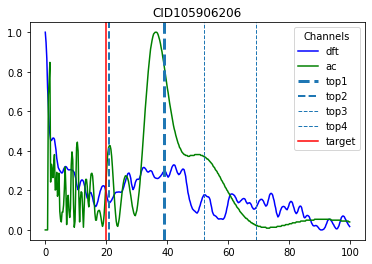

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


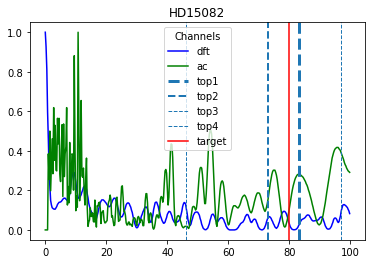

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


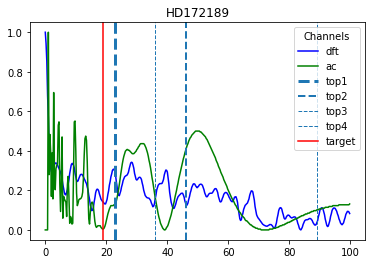

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


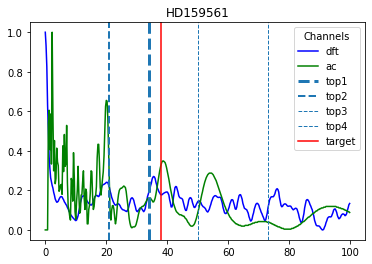

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


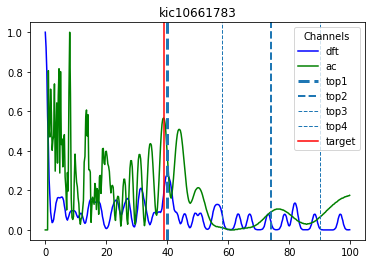

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


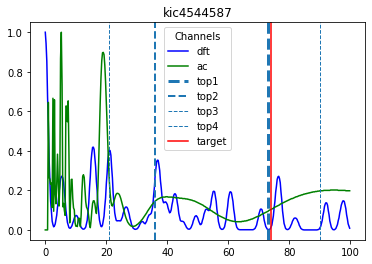

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


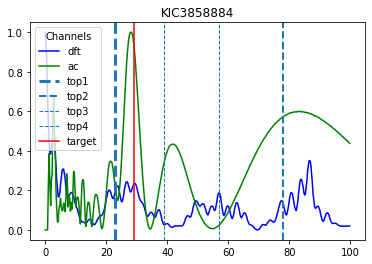

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


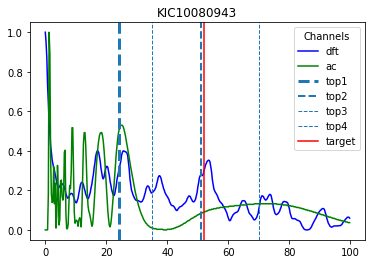

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


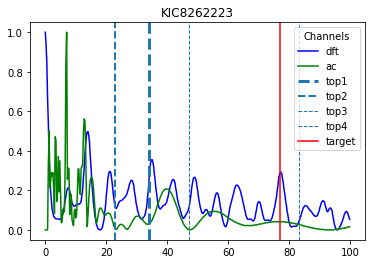

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


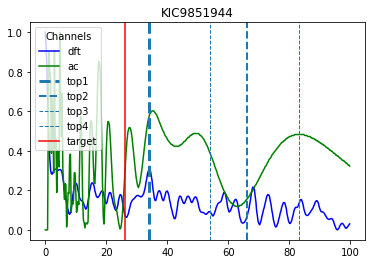

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


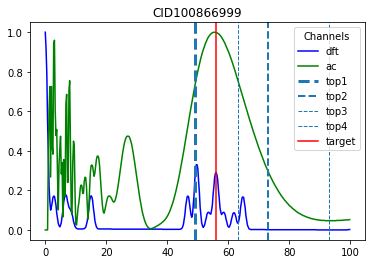

In [19]:
dnu_sun = 134.8

# Save results and predictions
results = {}
for star in df_start.take(11):  # take the 11 ds stars
    target = np.where(star[2].numpy().flat == 1)[0].flat[0]
    # Save results
    if star[0].numpy()[0].decode("utf-8") not in results:
        results[star[0].numpy()[0].decode("utf-8")] = {
            "dnu-target": target,
        }

    # Calculate gradient explainers and shap values
    shap_values, indexes = e.shap_values(
        star[1].numpy(), nsamples=100, ranked_outputs=4
    )

    
    probs = sepconv_mod.predict_proba(star[1])[0]
    peaks, _ = find_peaks(probs, height=0, distance=10)
    peaks_width = peak_widths(probs, peaks)
    peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]


    # save top-k
    best_peak, best_peak_width = get_peak_width(
        0, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top1"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top1"] = best_peak_width
 
    # save top-k
    best_peak, best_peak_width = get_peak_width(
        1, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top2"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top2"] = best_peak_width

    # save top-k
    best_peak, best_peak_width = get_peak_width(
        2, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top3"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top3"] = best_peak_width

    # save top-k
    best_peak, best_peak_width = get_peak_width(
        3, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top4"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top4"] = best_peak_width

    # Get L from Teff,Dnu model
    L = csv_ds[csv_ds.ID.eq(star[0].numpy()[0].decode("utf-8").upper())]["L"].values
    Teff = csv_ds[csv_ds.ID.eq(star[0].numpy()[0].decode("utf-8").upper())][
        "Teff"
    ].values
    if len(L) > 0 and not np.isnan(L) and not np.isnan(Teff):
        l_teff_topk1 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top1"], Teff]
            ).reshape(1, 2)
        )[0]

        l_teff_topk2 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top2"], Teff]
            ).reshape(1, 2)
        )[0]
        l_teff_topk3 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top3"], Teff]
            ).reshape(1, 2)
        )[0]

        # Get L errors
        ls_teff_topks = [l_teff_topk1, l_teff_topk2, l_teff_topk3]
        # Get L errors
        errors = [
            round(np.power(l_teff_topk1 - L[0], 2), 2),
            round(np.power(l_teff_topk2 - L[0], 2), 2),
            round(np.power(l_teff_topk3 - L[0], 2), 2),
        ]
        i = np.argmin(errors)  # Get min error position
        L = ls_teff_topks[i]  # Get most probable L from the model

        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up-fromstarmodel"] = (
            get_dnu_from_rho(rho_q_up) * dnu_sun
        )
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down-fromstarmodel"] = (
            get_dnu_from_rho(rho_q_down) * dnu_sun
        )
    else:
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-up-fromstarmodel"
        ] = np.nan
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-down-fromstarmodel"
        ] = np.nan

    # Get P from L
    # Check for non L in csv or NaN value
    L = csv_ds[csv_ds.ID.eq(star[0].numpy()[0].decode("utf-8").upper())]["L"].values
    if len(L) > 0 and not np.isnan(L):
        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = (
            get_dnu_from_rho(rho_q_up[0]) * dnu_sun
        )
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down"] = (
            get_dnu_from_rho(rho_q_down[0]) * dnu_sun
        )
    else:
        print(star[0].numpy()[0].decode("utf-8"))
        print(L)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = np.nan
        results[star[0].numpy()[0].decode("utf-8")]["v-from-P-down"] = np.nan

    if True:
        x = np.arange(0, 100, 0.25)  # x axis from 0 to 100
        plt.plot(x, star[1][0, :, 0], label="dft", color="blue")
        # plt.plot(x, star[1][0, :, 1], label="hod", color="orange", alpha=0.5)
        plt.plot(x, star[1][0, :, 1], label="ac", color="green")
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top1"],
            label="top1",
            linestyle="dashed",
            linewidth=3,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top2"],
            label="top2",
            linestyle="dashed",
            linewidth=2,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top3"],
            label="top3",
            linestyle="dashed",
            linewidth=1,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top4"],
            label="top4",
            linestyle="dashed",
            linewidth=1,
        )
        plt.axvline(x=target, label="target", color="red")
        plt.title(star[0].numpy()[0].decode("utf-8"))
        plt.legend(title="Channels")
        plt.show()

In [20]:
"""
ind_output_rank = 0

ind = np.arange(-1, 100.5, 0.25)

plt.subplots(1, figsize=(9, 4), dpi=120)
plt.bar(ind, np.ndarray.flatten(shap_values[ind_output_rank][0][:, [0]]), 0.5)
plt.bar(ind, np.ndarray.flatten(shap_values[ind_output_rank][0][:, [1]]), 0.5, 
        bottom=np.ndarray.flatten(shap_values[ind_output_rank][0][:, [0]]))
plt.bar(ind, np.ndarray.flatten(shap_values[ind_output_rank][0][:, [2]]), 0.5, 
        bottom=np.ndarray.flatten(shap_values[ind_output_rank][0][:, [0]])+np.ndarray.flatten(shap_values[ind_output_rank][0][:, [1]]))
plt.show()
"""

'\nind_output_rank = 0\n\nind = np.arange(-1, 100.5, 0.25)\n\nplt.subplots(1, figsize=(9, 4), dpi=120)\nplt.bar(ind, np.ndarray.flatten(shap_values[ind_output_rank][0][:, [0]]), 0.5)\nplt.bar(ind, np.ndarray.flatten(shap_values[ind_output_rank][0][:, [1]]), 0.5, \n        bottom=np.ndarray.flatten(shap_values[ind_output_rank][0][:, [0]]))\nplt.bar(ind, np.ndarray.flatten(shap_values[ind_output_rank][0][:, [2]]), 0.5, \n        bottom=np.ndarray.flatten(shap_values[ind_output_rank][0][:, [0]])+np.ndarray.flatten(shap_values[ind_output_rank][0][:, [1]]))\nplt.show()\n'

In [21]:
df = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "top1",
        "e-top1",
        "top2",
        "e-top2",
        "top3",
        "e-top3",
        "top4",
        "e-top4",
        "dnu-from-P-up-fromstarmodel",
        "dnu-from-P-down-fromstarmodel",
        "dnu-from-P-up",
        "dnu-from-P-down"

    ]
)
for i, id in enumerate(results):
    df.loc[i] = [
        id,
        results[id]["dnu-target"],
        results[id]["top1"],
        results[id]["e-top1"],
        results[id]["top2"],
        results[id]["e-top2"],
        results[id]["top3"],
        results[id]["e-top3"],
        results[id]["top4"],
        results[id]["e-top4"],
        results[id]["dnu-from-P-up-fromstarmodel"],
        results[id]["dnu-from-P-down-fromstarmodel"],
        results[id]["dnu-from-P-up"],
        results[id]["dnu-from-P-down"]
    ]
df

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0   CID105906206         20   39  1.229034   21  1.178451   69  2.962202   52   
1        HD15082         80   83  1.011470   73  1.015208   97  0.954947   46   
2       HD172189         19   23  1.634795   46  1.377856   36  1.718467   89   
3       HD159561         38   34  2.024747   21  1.064188   50  1.013231   73   
4    kic10661783         39   40  1.297765   74  2.518126   90  1.087349   58   
5     kic4544587         74   73  1.929718   36  1.490254   90  1.030482   21   
6     KIC3858884         29   23  3.613644   78  2.693781   57  1.409748   39   
7    KIC10080943         52   24  2.963901   51  1.824679   35  0.926366   70   
8     KIC8262223         77   34  1.161095   23  0.757434   83  1.005299   47   
9     KIC9851944         26   34  2.605530   66  1.189474   83  1.003733   54   
10  CID100866999         56   49  1.044763   73  1.029168   63  1.455164   93   

      e-top4  dnu-from-P-up-fromstarmodel  dnu-from-P-down-fromstarmodel  \
0   1.141167                    64.042692                      34.697756   
1   1.144795                    43.528838                      22.730814   
2   1.336333                    40.357761                      20.910562   
3   1.730440                    34.027855                      17.310899   
4   1.154284                    44.302645                      23.176493   
5   1.116072                    76.701555                      42.192500   
6   1.314869                    42.151076                      21.938707   
7   1.046125                    61.269535                      33.064872   
8   1.311323                    48.018671                      25.324228   
9   1.387807                    54.742502                      29.237891   
10  0.980278                    89.940828                      50.083119   

    dnu-from-P-up  dnu-from-P-down  
0       71.165271        38.907339  
1       93.569327        52.252186  
2       34.079468        17.340043  
3       38.537790        19.870672  
4       34.545158        17.603175  
5       90.413084        50.365296  
6       41.985046        21.843379  
7       85.316430        47.322315  
8      104.970838        59.080258  
9       22.013591        10.647775  
10     126.330451        71.900529

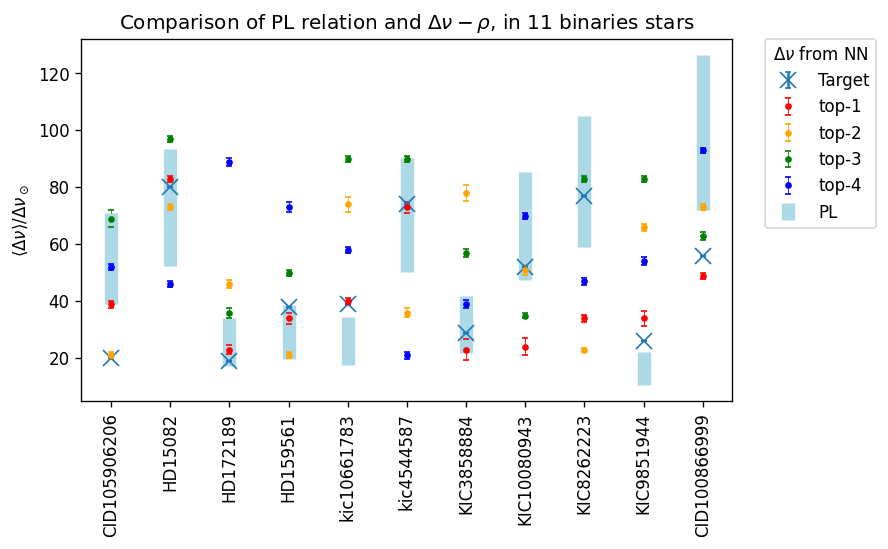

In [22]:
plt.subplots(1, figsize=(7, 4), dpi=120)

plt.errorbar(
    df["id"],
    df["dnu-target"],
    0,
    fmt="x",
    markersize=10,
    capsize=2,
    label="Target"
)

plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
plt.errorbar(
    df["id"],
    df["top4"],
    df["e-top4"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="blue",
    label="top-4",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)

plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
#plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 11 binaries stars")
#plt.ylim(0, 1.0)
plt.show()

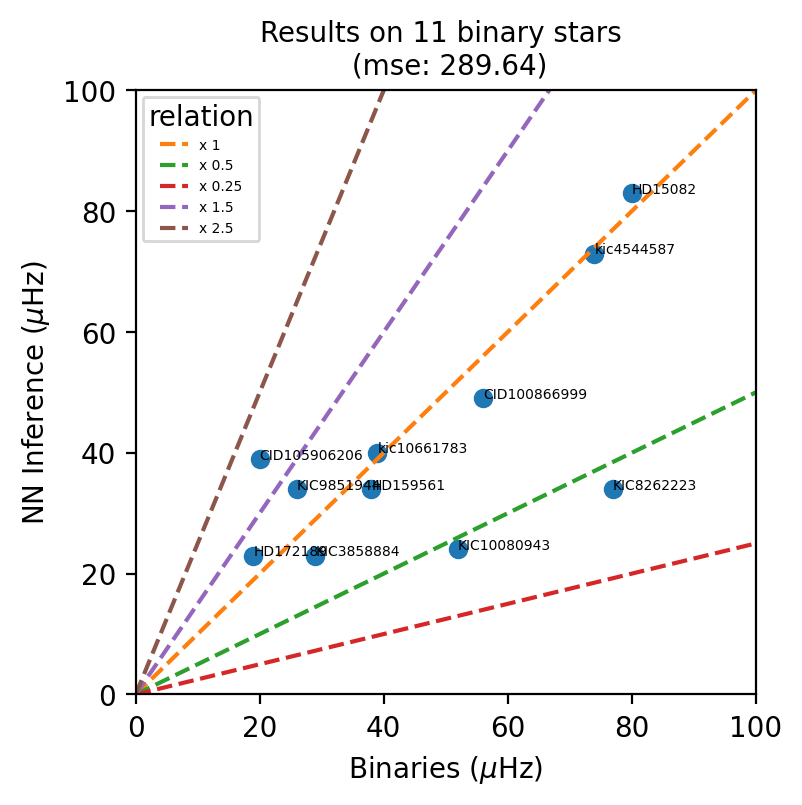

In [23]:
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])
    
# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o") # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
abline(1.5, 0)
abline(2.5, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("Binaries ($\mu$Hz)")
plt.ylabel("NN Inference ($\mu$Hz)")
plt.title("Results on 11 binary stars \n (mse: %s)" % np.round(np.mean(np.power(np.asarray(targets)-np.asarray(inferences), 2)), 2), fontsize=10)
plt.show()
plt.show()

In [24]:
results_binaries = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "e-dnu-target",
        "dnu-from-P",
        "e-dnu-from-P",
        "best-top",
        "e-best-top",
        "ktop",
    ]
)

for index, row in df.iterrows():
    print("Proccessing star %s" % row["id"])
    print("PL[%f,%f]" % (row["dnu-from-P-up"], row["dnu-from-P-down"]))
    # Top index to search on 
    top_indexs = ["top1", "top2", "top3"]
    best = np.nan # empty on start
    # Center of PL window
    central_pl_window = row["dnu-from-P-up"]-((row["dnu-from-P-up"]-row["dnu-from-P-down"])/2)
    # Check predictions indise L window
    inside_pl_window = []
    for top_index in top_indexs:
        flag_full_inside = (row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"]) & (row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
        flag_partial =  ((row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"]) & (row[top_index] - row["e-%s" % (top_index)] <= row["dnu-from-P-up"])) | ((row[top_index] + row["e-%s" % (top_index)] >= row["dnu-from-P-down"]) & (row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"])) 
        if flag_full_inside or flag_partial:
            inside_pl_window.append(top_index)
    print("   =>Inside PL window: %s" % inside_pl_window)

    if (len(inside_pl_window) > 0) and (not np.isnan(row["dnu-from-P-up"])):
        print("=>",inside_pl_window)
        top_index = inside_pl_window[0] # Get most probable from NN
        
        # Get best
        best = row["%s" % (top_index)]
        results_binaries.loc[len(results_binaries)] = [
                        row["id"],
                        row["dnu-target"],
                        0.23,
                        (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
                        row["dnu-from-P-up"] - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
                        best,
                        row["e-%s" % top_index],
                        top_index
                    ]
    else:
        # Get closest inference to the center of PL window
        top_index = np.argmin([np.abs(row[top_index]-central_pl_window) for top_index in top_indexs])
        # Check if predictions is not inside window
        # Get best
        best = row["top%s" % (top_index+1)]
        results_binaries.loc[len(results_binaries)] = [
                        row["id"],
                        row["dnu-target"],
                        0.23,
                        (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
                        row["dnu-from-P-up"] - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
                        best,
                        row["e-top%s" % (top_index+1)],
                        top_index
                    ]

Proccessing star CID105906206
PL[71.165271,38.907339]
   =>Inside PL window: ['top1', 'top3']
=> ['top1', 'top3']
Proccessing star HD15082
PL[93.569327,52.252186]
   =>Inside PL window: ['top1', 'top2']
=> ['top1', 'top2']
Proccessing star HD172189
PL[34.079468,17.340043]
   =>Inside PL window: ['top1']
=> ['top1']
Proccessing star HD159561
PL[38.537790,19.870672]
   =>Inside PL window: ['top1', 'top2']
=> ['top1', 'top2']
Proccessing star kic10661783
PL[34.545158,17.603175]
   =>Inside PL window: []
Proccessing star kic4544587
PL[90.413084,50.365296]
   =>Inside PL window: ['top1', 'top3']
=> ['top1', 'top3']
Proccessing star KIC3858884
PL[41.985046,21.843379]
   =>Inside PL window: ['top1']
=> ['top1']
Proccessing star KIC10080943
PL[85.316430,47.322315]
   =>Inside PL window: ['top2']
=> ['top2']
Proccessing star KIC8262223
PL[104.970838,59.080258]
   =>Inside PL window: ['top3']
=> ['top3']
Proccessing star KIC9851944
PL[22.013591,10.647775]
   =>Inside PL window: []
Proccessing st

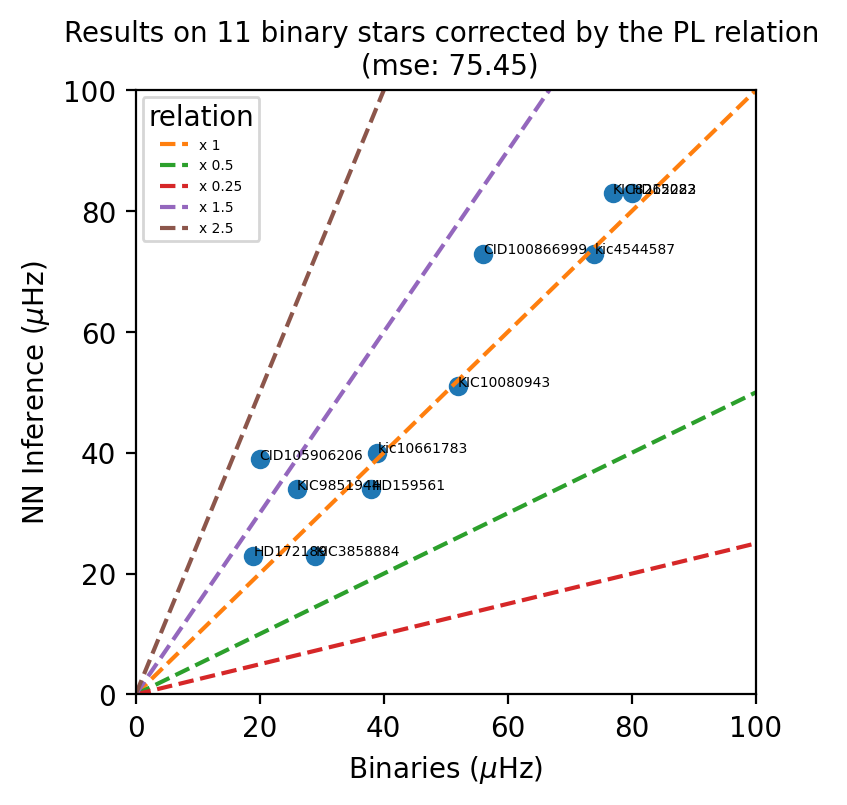

In [25]:
# Prepare data plot
targets = results_binaries["dnu-target"]
inferences = results_binaries["best-top"]
ids = results_binaries["id"]

# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o") # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
abline(1.5, 0)
abline(2.5, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("Binaries ($\mu$Hz)")
plt.ylabel("NN Inference ($\mu$Hz)")
plt.title("Results on 11 binary stars corrected by the PL relation \n (mse: %s)" % np.round(np.mean(np.power(np.asarray(targets)-np.asarray(inferences), 2)), 2), fontsize=10)
plt.show()

## Read and process Bedding stars 

In [26]:
# Read datasets of preprocessed stars
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


#### Read L from file

In [27]:
"""
df_att = pd.io.parsers.read_csv("../data/bedding/bedding.csv", sep=",", index_col=0)
rows = []
for i,row in pd.io.parsers.read_csv("../data/bedding/parameters.csv", sep=",", header=1, names=["star", "L", "Teff", "dnu"]).iterrows():
    print(row)
    L = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["L"].values[0]
    Teff = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["Teff"].values[0]
    rows.append([row["star"], L, Teff, row["dnu"]])
df_aux = pd.DataFrame(rows, columns = ['star', 'L', "Teff", "dnu"])  
print(df_aux.head(57))
df_aux.to_csv("../data/bedding/parameters.csv", index=False, header=True)
"""

'\ndf_att = pd.io.parsers.read_csv("../data/bedding/bedding.csv", sep=",", index_col=0)\nrows = []\nfor i,row in pd.io.parsers.read_csv("../data/bedding/parameters.csv", sep=",", header=1, names=["star", "L", "Teff", "dnu"]).iterrows():\n    print(row)\n    L = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["L"].values[0]\n    Teff = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["Teff"].values[0]\n    rows.append([row["star"], L, Teff, row["dnu"]])\ndf_aux = pd.DataFrame(rows, columns = [\'star\', \'L\', "Teff", "dnu"])  \nprint(df_aux.head(57))\ndf_aux.to_csv("../data/bedding/parameters.csv", index=False, header=True)\n'

In [28]:
df_att = pd.io.parsers.read_csv("../data/bedding/bedding.csv", sep=",", index_col=0)
df_att

HD             Name         TIC      V    Teff      L  e.L.   rho  \
1     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
2     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
3    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
4    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
5    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
6    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
7    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
8    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
9    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
10   24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
11   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
12   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
13   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
14   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
15   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
16   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
17   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
18   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
19   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
20   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
21   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
22   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
23   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
24   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
25   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
26   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
27   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
28   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
29   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
30   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
31   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
32   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
33   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
34   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
35   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
36   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
37   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
38   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
39   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
40   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
41   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
42   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
43   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
44   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
45   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
46   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
47  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
48  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
49  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
50  290750.0              NaN    11199304   9.77  9170.0  19

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


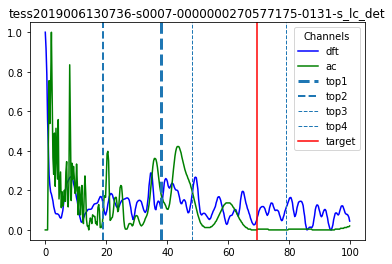

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


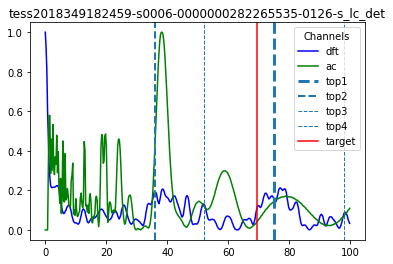

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


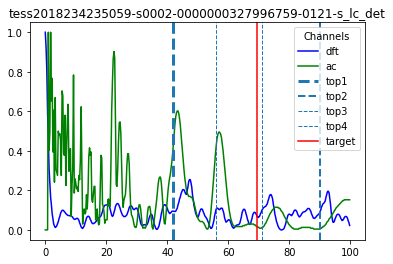

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


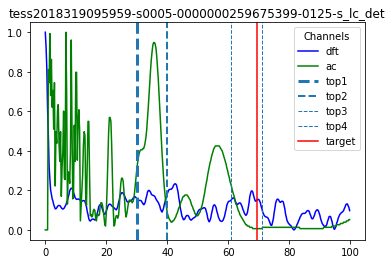

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


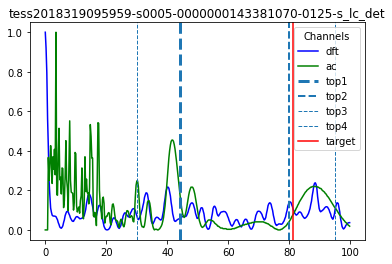

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


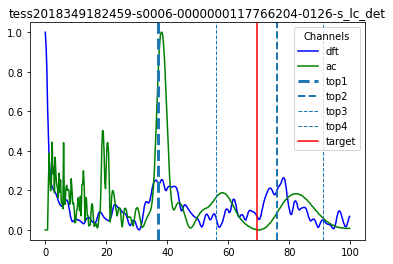

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


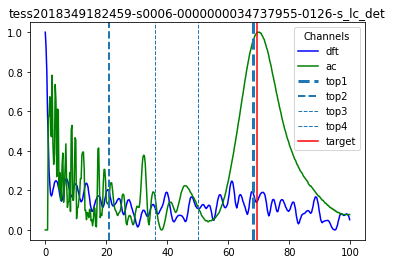

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


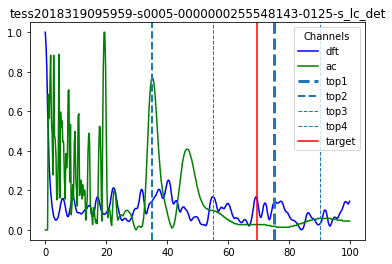

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


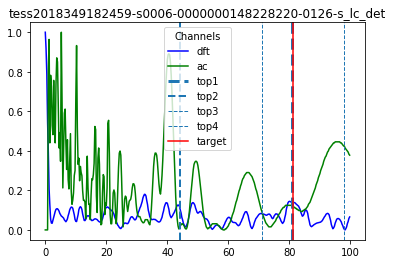

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


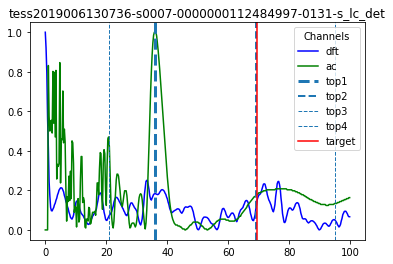

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


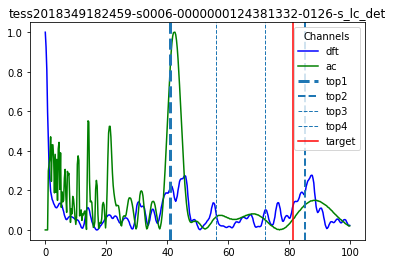

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


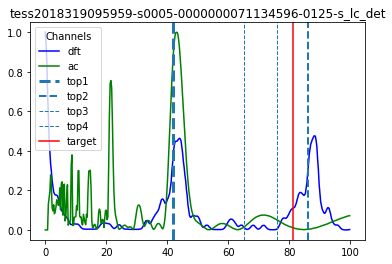

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


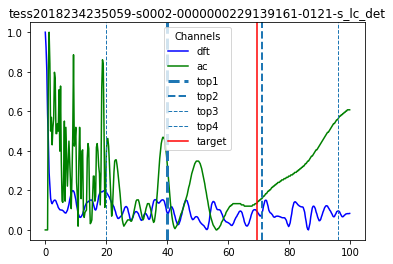

tess2018319095959-s0005-0000000459942890-0125-s_lc_det
[nan]


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


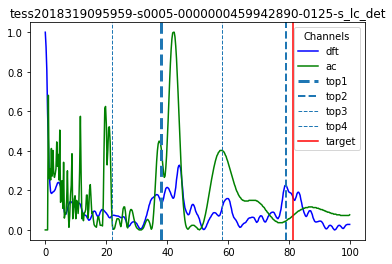

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


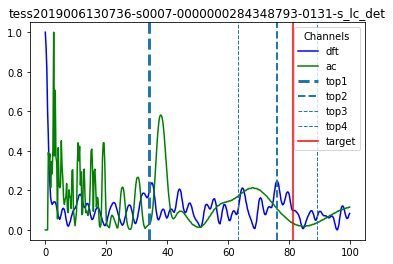

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


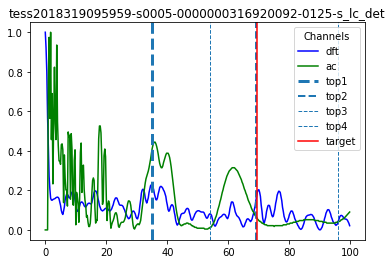

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


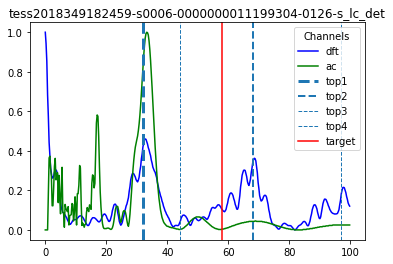

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


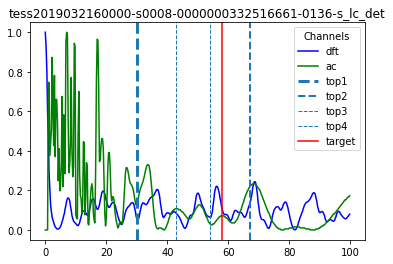

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


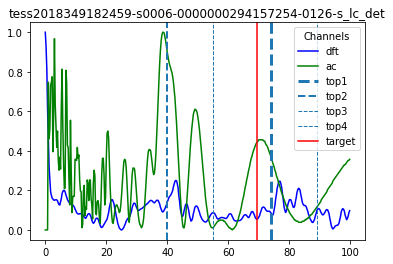

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


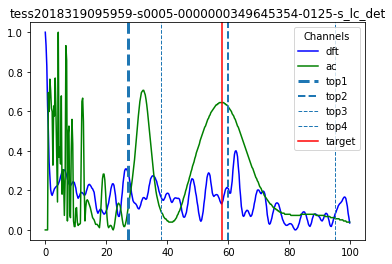

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


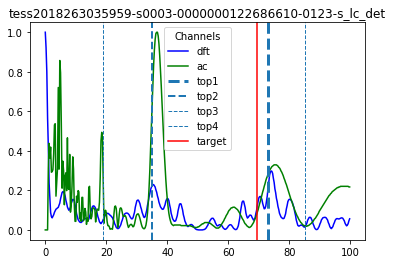

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


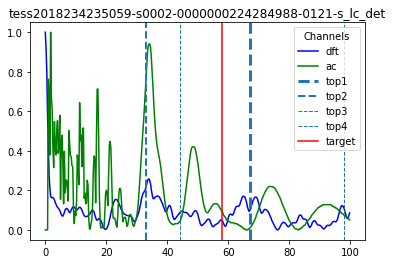

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


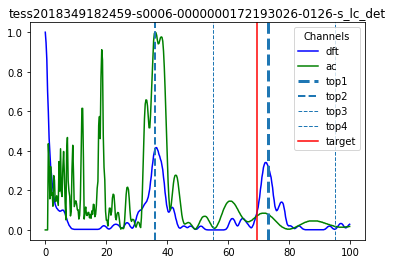

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


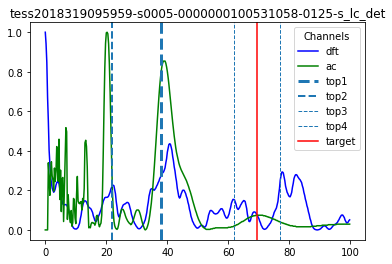

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


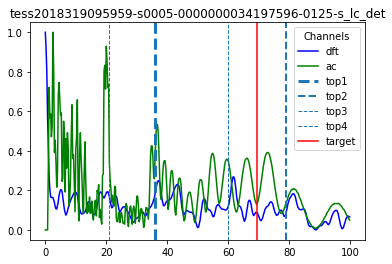

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


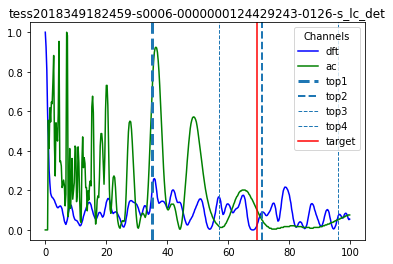

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tess2019169103026-s0013-0000000269792989-0146-s_lc_det
[nan]


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


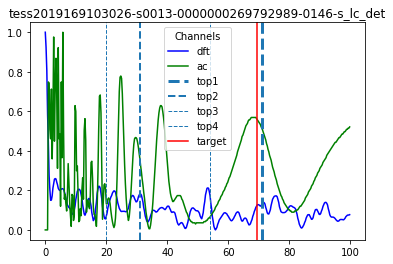

tess2019058134432-s0009-0000000463556278-0139-s_lc_det
[nan]


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


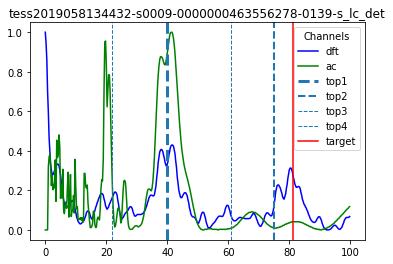

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


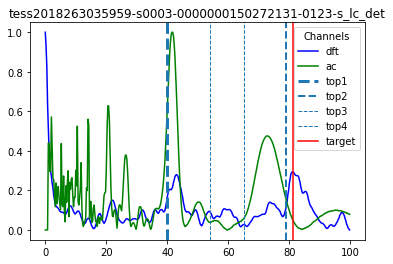

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


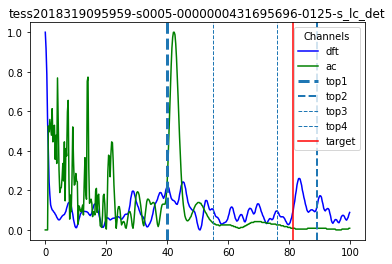

tess2019058134432-s0009-0000000388351327-0139-s_lc_det
[nan]


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


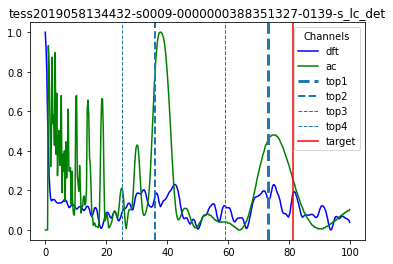

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


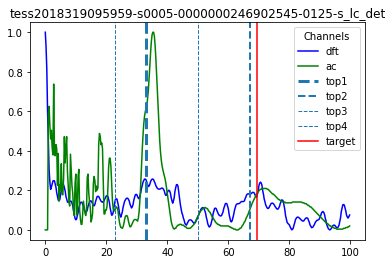

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


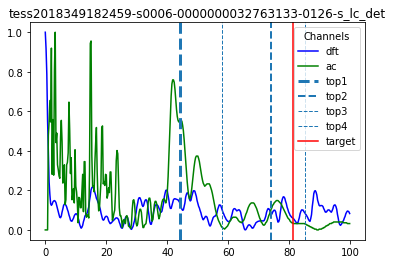

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


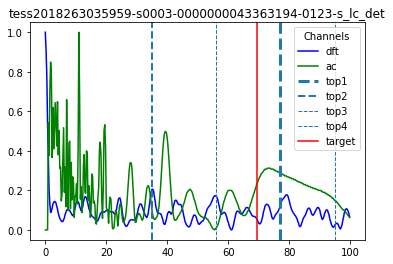

tess2019032160000-s0008-0000000176400189-0136-s_lc_det
[nan]


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


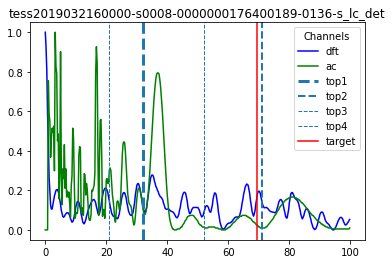

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


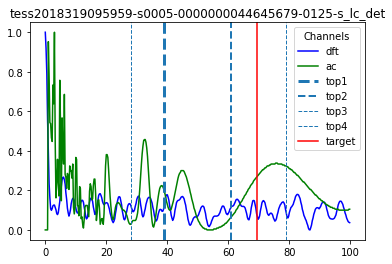

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


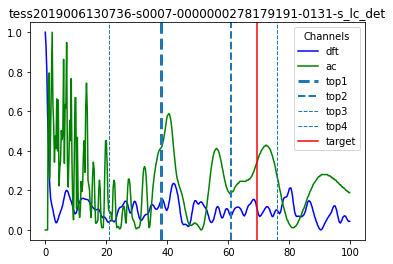

tess2018319095959-s0005-0000000306773428-0125-s_lc_det
[nan]


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


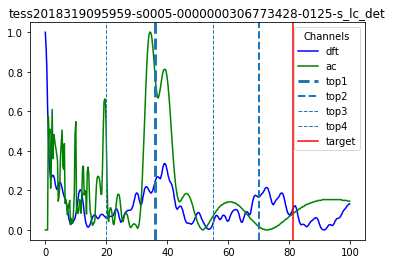

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


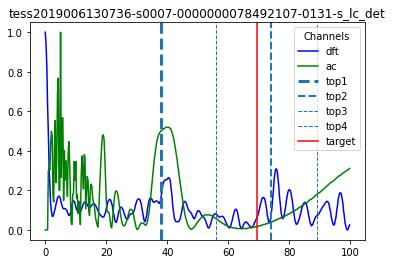

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


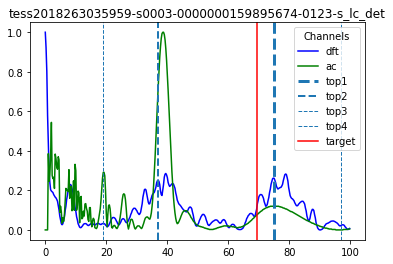

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tess2018319095959-s0005-0000000024344701-0125-s_lc_det
[nan]


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


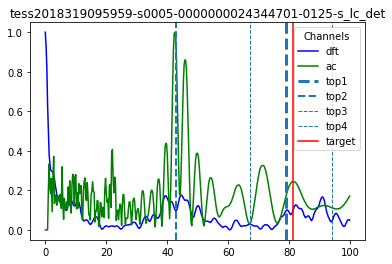

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


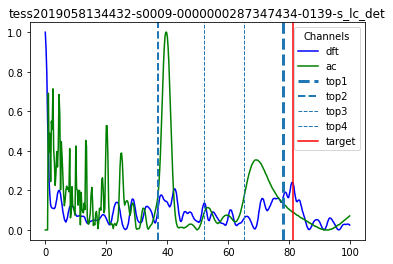

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


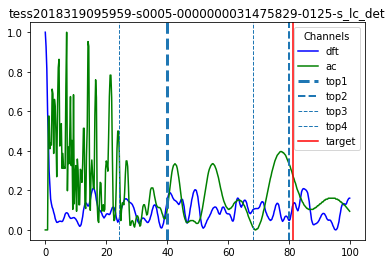

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


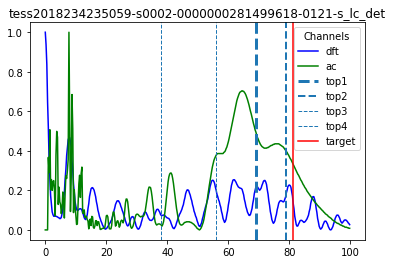

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


tess2018319095959-s0005-0000000009147509-0125-s_lc_det
[nan]


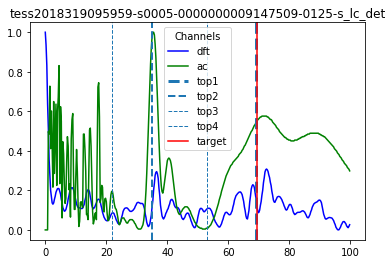

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


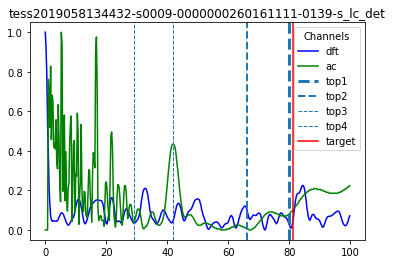

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


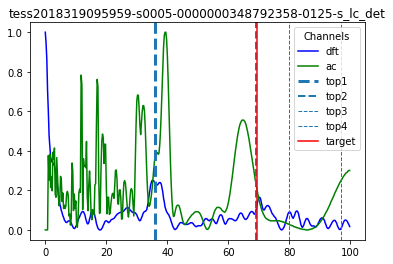

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
tess2018234235059-s0002-0000000316806320-0121-s_lc_det
[nan]


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


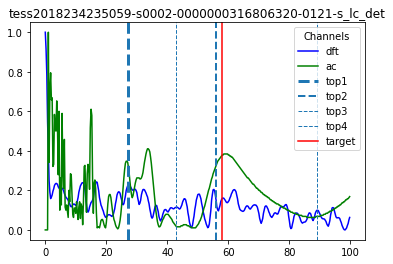

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


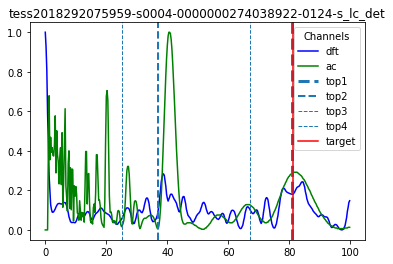

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


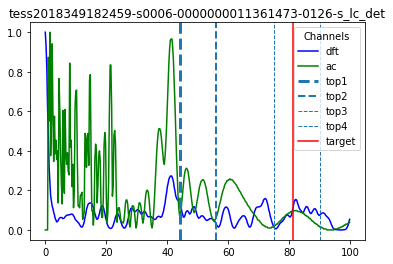

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


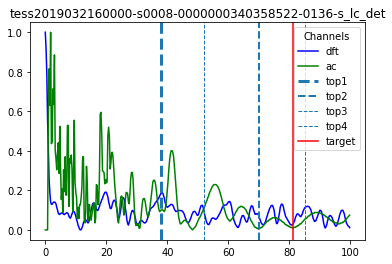

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


tess2018263035959-s0003-0000000231014033-0123-s_lc_det
[nan]


`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


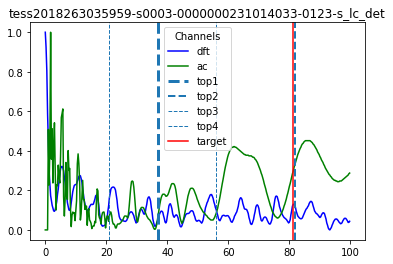

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


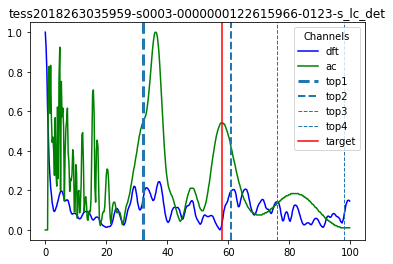

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


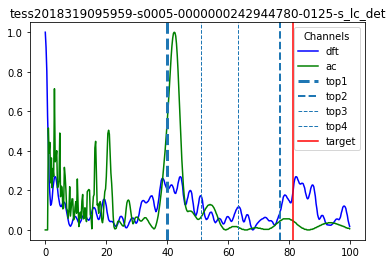

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


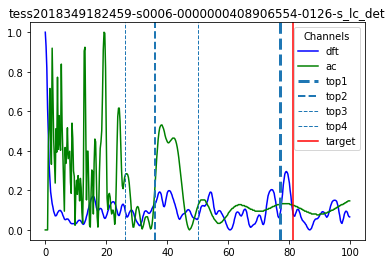

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


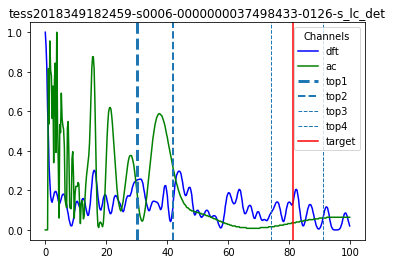

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


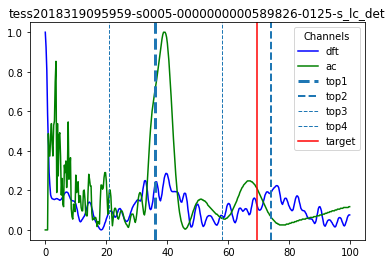

In [29]:
# Save results and predictions
results = {}
for star in df_bedding.take(57):  # take the stars
    target = np.where(star[2].numpy().flat == 1)[0].flat[0] / 0.0864
    # Save results
    if star[0].numpy()[0].decode("utf-8") not in results:
        results[star[0].numpy()[0].decode("utf-8")] = {
            "dnu-target": target,
        }

    # Calculate gradient explainers and shap values
    shap_values, indexes = e.shap_values(star[1].numpy(), nsamples=100, ranked_outputs=4)
    
    probs = sepconv_mod.predict_proba(star[1])[0]
    peaks, _ = find_peaks(probs, height=0, distance=10)
    peaks_width = peak_widths(probs, peaks)
    peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]
    best_peak, best_peak_width = get_peak_width(0, peaks, peaks_width, peaks_sorted_by_prob)

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top1"] = np.where(
        probs == peaks_sorted_by_prob[0]
    )[0][0]
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top1"] = best_peak_width

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top2"] = np.where(
        probs == peaks_sorted_by_prob[1]
    )[0][0]
    # Get error
    best_peak, best_peak_width = get_peak_width(1, peaks, peaks_width, peaks_sorted_by_prob)
    results[star[0].numpy()[0].decode("utf-8")]["e-top2"] = best_peak_width

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top3"] = np.where(
        probs == peaks_sorted_by_prob[2]
    )[0][0]
    # Get error
    best_peak, best_peak_width = get_peak_width(2, peaks, peaks_width, peaks_sorted_by_prob)
    results[star[0].numpy()[0].decode("utf-8")]["e-top3"] = best_peak_width

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top4"] = np.where(
        probs == peaks_sorted_by_prob[3]
    )[0][0]
    # Get error
    best_peak, best_peak_width = get_peak_width(3, peaks, peaks_width, peaks_sorted_by_prob)
    results[star[0].numpy()[0].decode("utf-8")]["e-top4"] = best_peak_width




    L = df_att[
        df_att.TIC.eq(str(int(star[0].numpy()[0].decode("utf-8").split("-")[2])))
    ]["L"].values
    Teff = df_att[
        df_att.TIC.eq(str(int(star[0].numpy()[0].decode("utf-8").split("-")[2])))
    ]["Teff"].values
    if len(Teff) > 0 and not np.isnan(Teff):

        l_teff_topk1 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top1"], Teff]
            ).reshape(1, 2)
        )[0]
        l_teff_topk2 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top2"], Teff]
            ).reshape(1, 2)
        )[0]
        l_teff_topk3 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top3"], Teff]
            ).reshape(1, 2)
        )[0]

        # Get L errors
        ls_teff_topks = [l_teff_topk1, l_teff_topk2, l_teff_topk3]
        # Get L errors
        errors = [
            round(np.power(l_teff_topk1 - L[0], 2), 2),
            round(np.power(l_teff_topk2 - L[0], 2), 2),
            round(np.power(l_teff_topk3 - L[0], 2), 2)
        ]
        i = np.argmin(errors)  # Get min error position
        L = ls_teff_topks[i]  # Get most probable L from the model

        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)

        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-up-fromstarmodel"
        ] = get_dnu_from_rho(rho_q_up) * dnu_sun
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-down-fromstarmodel"
        ] = get_dnu_from_rho(rho_q_down) * dnu_sun
    else:
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-up-fromstarmodel"
        ] = np.nan
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-down-fromstarmodel"
        ] = np.nan


    # Get L from Teff,Dnu model
    L = df_att[
        df_att.TIC.eq(str(int(star[0].numpy()[0].decode("utf-8").split("-")[2])))
    ]["L"].values
    if len(L) > 0 and not np.isnan(L):
        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = get_dnu_from_rho(rho_q_up[0]) * dnu_sun
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down"] = get_dnu_from_rho(rho_q_down[0]) * dnu_sun
    else:
        print(star[0].numpy()[0].decode("utf-8"))
        print(L)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = np.nan
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down"] = np.nan


    if True:
        x = np.arange(0, 100, 0.25)  # x axis from 0 to 100
        plt.plot(x, star[1][0, :, 0], label="dft", color="blue")
        #plt.plot(x, star[1][0, :, 1], label="hod", color="orange", alpha=0.5)
        plt.plot(x, star[1][0, :, 1], label="ac", color="green")
        plt.axvline(x=results[star[0].numpy()[0].decode("utf-8")]["top1"], label="top1", linestyle="dashed", linewidth = 3)
        plt.axvline(x=results[star[0].numpy()[0].decode("utf-8")]["top2"], label="top2", linestyle="dashed", linewidth = 2)
        plt.axvline(x=results[star[0].numpy()[0].decode("utf-8")]["top3"], label="top3", linestyle="dashed", linewidth = 1)
        plt.axvline(x=results[star[0].numpy()[0].decode("utf-8")]["top4"], label="top4", linestyle="dashed", linewidth = 1)
        plt.axvline(x=target, label="target", color="red")
        plt.title(star[0].numpy()[0].decode("utf-8"))
        plt.legend(title="Channels")
        plt.show()

In [30]:
df = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "top1",
        "e-top1",
        "top2",
        "e-top2",
        "top3",
        "e-top3",
        "top4",
        "e-top4",
        "dnu-from-P-up-fromstarmodel",
        "dnu-from-P-down-fromstarmodel",
        "dnu-from-P-up",
        "dnu-from-P-down"

    ]
)
for i, id in enumerate(results):
    df.loc[i] = [
        id,
        results[id]["dnu-target"],
        results[id]["top1"],
        results[id]["e-top1"],
        results[id]["top2"],
        results[id]["e-top2"],
        results[id]["top3"],
        results[id]["e-top3"],
        results[id]["top4"],
        results[id]["e-top4"],
        results[id]["dnu-from-P-up-fromstarmodel"],
        results[id]["dnu-from-P-down-fromstarmodel"],
        results[id]["dnu-from-P-up"],
        results[id]["dnu-from-P-down"]
    ]
df

id  dnu-target top1  \
0   tess2019006130736-s0007-0000000270577175-0131-...   69.444444   38   
1   tess2018349182459-s0006-0000000282265535-0126-...   69.444444   75   
2   tess2018234235059-s0002-0000000327996759-0121-...   69.444444   42   
3   tess2018319095959-s0005-0000000259675399-0125-...   69.444444   30   
4   tess2018319095959-s0005-0000000143381070-0125-...   81.018519   44   
5   tess2018349182459-s0006-0000000117766204-0126-...   69.444444   37   
6   tess2018349182459-s0006-0000000034737955-0126-...   69.444444   68   
7   tess2018319095959-s0005-0000000255548143-0125-...   69.444444   75   
8   tess2018349182459-s0006-0000000148228220-0126-...   81.018519   81   
9   tess2019006130736-s0007-0000000112484997-0131-...   69.444444   36   
10  tess2018349182459-s0006-0000000124381332-0126-...   81.018519   41   
11  tess2018319095959-s0005-0000000071134596-0125-...   81.018519   42   
12  tess2018234235059-s0002-0000000229139161-0121-...   69.444444   40   
13  tess2018319095959-s0005-0000000459942890-0125-...   81.018519   38   
14  tess2019006130736-s0007-0000000284348793-0131-...   81.018519   34   
15  tess2018319095959-s0005-0000000316920092-0125-...   69.444444   35   
16  tess2018349182459-s0006-0000000011199304-0126-...   57.870370   32   
17  tess2019032160000-s0008-0000000332516661-0136-...   57.870370   30   
18  tess2018349182459-s0006-0000000294157254-0126-...   69.444444   74   
19  tess2018319095959-s0005-0000000349645354-0125-...   57.870370   27   
20  tess2018263035959-s0003-0000000122686610-0123-...   69.444444   73   
21  tess2018234235059-s0002-0000000224284988-0121-...   57.870370   67   
22  tess2018349182459-s0006-0000000172193026-0126-...   69.444444   73   
23  tess2018319095959-s0005-0000000100531058-0125-...   69.444444   38   
24  tess2018319095959-s0005-0000000034197596-0125-...   69.444444   36   
25  tess2018349182459-s0006-0000000124429243-0126-...   69.444444   35   
26  tess2019169103026-s0013-0000000269792989-0146-...   69.444444   71   
27  tess2019058134432-s0009-0000000463556278-0139-...   81.018519   40   
28  tess2018263035959-s0003-0000000150272131-0123-...   81.018519   40   
29  tess2018319095959-s0005-0000000431695696-0125-...   81.018519   40   
30  tess2019058134432-s0009-0000000388351327-0139-...   81.018519   73   
31  tess2018319095959-s0005-0000000246902545-0125-...   69.444444   33   
32  tess2018349182459-s0006-0000000032763133-0126-...   81.018519   44   
33  tess2018263035959-s0003-0000000043363194-0123-...   69.444444   77   
34  tess2019032160000-s0008-0000000176400189-0136-...   69.444444   32   
35  tess2018319095959-s0005-0000000044645679-0125-...   69.444444   39   
36  tess2019006130736-s0007-0000000278179191-0131-...   69.444444   38   
37  tess2018319095959-s0005-0000000306773428-0125-...   81.018519   36   
38  tess2019006130736-s0007-0000000078492107-0131-...   69.444444   38   
39  tess2018263035959-s0003-0000000159895674-0123-...   69.444444   75   
40  tess2018319095959-s0005-0000000024344701-0125-...   81.018519   79   
41  tess2019058134432-s0009-0000000287347434-0139-...   81.018519   78   
42  tess2018319095959-s0005-0000000031475829-0125-...   81.018519   40   
43  tess2018234235059-s0002-0000000281499618-0121-...   81.018519   69   
44  tess2018319095959-s0005-0000000009147509-0125-...   69.444444   69   
45  tess2019058134432-s0009-0000000260161111-0139-...   81.018519   80   
46  tess2018319095959-s0005-0000000348792358-0125-...   69.444444   36   
47  tess2018234235059-s0002-0000000316806320-0121-...   57.870370   27   
48  tess2018292075959-s0004-0000000274038922-0124-...   81.018519   81   
49  tess2018349182459-s0006-0000000011361473-0126-...   81.018519   44   
50  tess2019032160000-s0008-0000000340358522-0136-...   81.018519   38   
51  tess2018263035959-s0003-0000000231014033-0123-...   81.018519   37   
52  tess2018263035959-s0003-0000000122615966-0123-...   57.870370   32   
53  tess2018319095959-s0005-0000000242944780-0125-...  

In [31]:
stars_fundamental_mode = ["tess2018263035959-s0003-0000000159895674-0123-s_lc_det",
                          "tess2018319095959-s0005-0000000044645679-0125-s_lc_det",
                          "tess2018319095959-s0005-0000000459942890-0125-s_lc_det",
                          "tess2018319095959-s0005-0000000009147509-0125-s_lc_det",
                          "tess2018319095959-s0005-0000000316920092-0125-s_lc_det",
                          "tess2018292075959-s0004-0000000274038922-0124-s_lc_det",
                          "tess2018349182459-s0006-0000000282265535-0126-s_lc_det",
                          "tess2018349182459-s0006-0000000408906554-0126-s_lc_det",
                          "tess2018319095959-s0005-0000000255548143-0125-s_lc_det",
                          "tess2018349182459-s0006-0000000172193026-0126-s_lc_det",
                          "tess2018349182459-s0006-0000000294157254-0126-s_lc_det",
                          "tess2019058134432-s0009-0000000287347434-0139-s_lc_det",
                          "tess2018349182459-s0006-0000000011361473-0126-s_lc_det",
                          "tess2019058134432-s0009-0000000388351327-0139-s_lc_det",
                          "tess2019032160000-s0008-0000000176400189-0136-s_lc_det",
                          "tess2018263035959-s0003-0000000043363194-0123-s_lc_det",
                          "tess2018234235059-s0002-0000000327996759-0121-s_lc_det",
                          "tess2018234235059-s0002-0000000224284988-0121-s_lc_det",
                          "tess2019032160000-s0008-0000000332516661-0136-s_lc_det"]

In [32]:
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])
    
# Get inferenes "close" to targets and create a True/Flase flag
sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
vals = np.asarray(targets, dtype=float)[sign==True] 

# Get stars in stars_fundamental_mode list mode
list_stars_in_fundamental_model = [(i, i in stars_fundamental_mode) for i in df[sign]["id"].values]
import pprint
print(pprint.pformat(list_stars_in_fundamental_model))

# Get percentage
print("Percentage of stars radial mode in NN inference: %f" % (sum([i in stars_fundamental_mode for i in df[sign]["id"].values]) / len(stars_fundamental_mode)))

[('tess2018349182459-s0006-0000000282265535-0126-s_lc_det', True),
 ('tess2018349182459-s0006-0000000034737955-0126-s_lc_det', False),
 ('tess2018319095959-s0005-0000000255548143-0125-s_lc_det', True),
 ('tess2018349182459-s0006-0000000148228220-0126-s_lc_det', False),
 ('tess2018349182459-s0006-0000000294157254-0126-s_lc_det', True),
 ('tess2018263035959-s0003-0000000122686610-0123-s_lc_det', False),
 ('tess2018234235059-s0002-0000000224284988-0121-s_lc_det', True),
 ('tess2018349182459-s0006-0000000172193026-0126-s_lc_det', True),
 ('tess2019169103026-s0013-0000000269792989-0146-s_lc_det', False),
 ('tess2019058134432-s0009-0000000388351327-0139-s_lc_det', True),
 ('tess2018263035959-s0003-0000000043363194-0123-s_lc_det', True),
 ('tess2018263035959-s0003-0000000159895674-0123-s_lc_det', True),
 ('tess2018319095959-s0005-0000000024344701-0125-s_lc_det', False),
 ('tess2019058134432-s0009-0000000287347434-0139-s_lc_det', True),
 ('tess2018319095959-s0005-0000000009147509-0125-s_lc_det

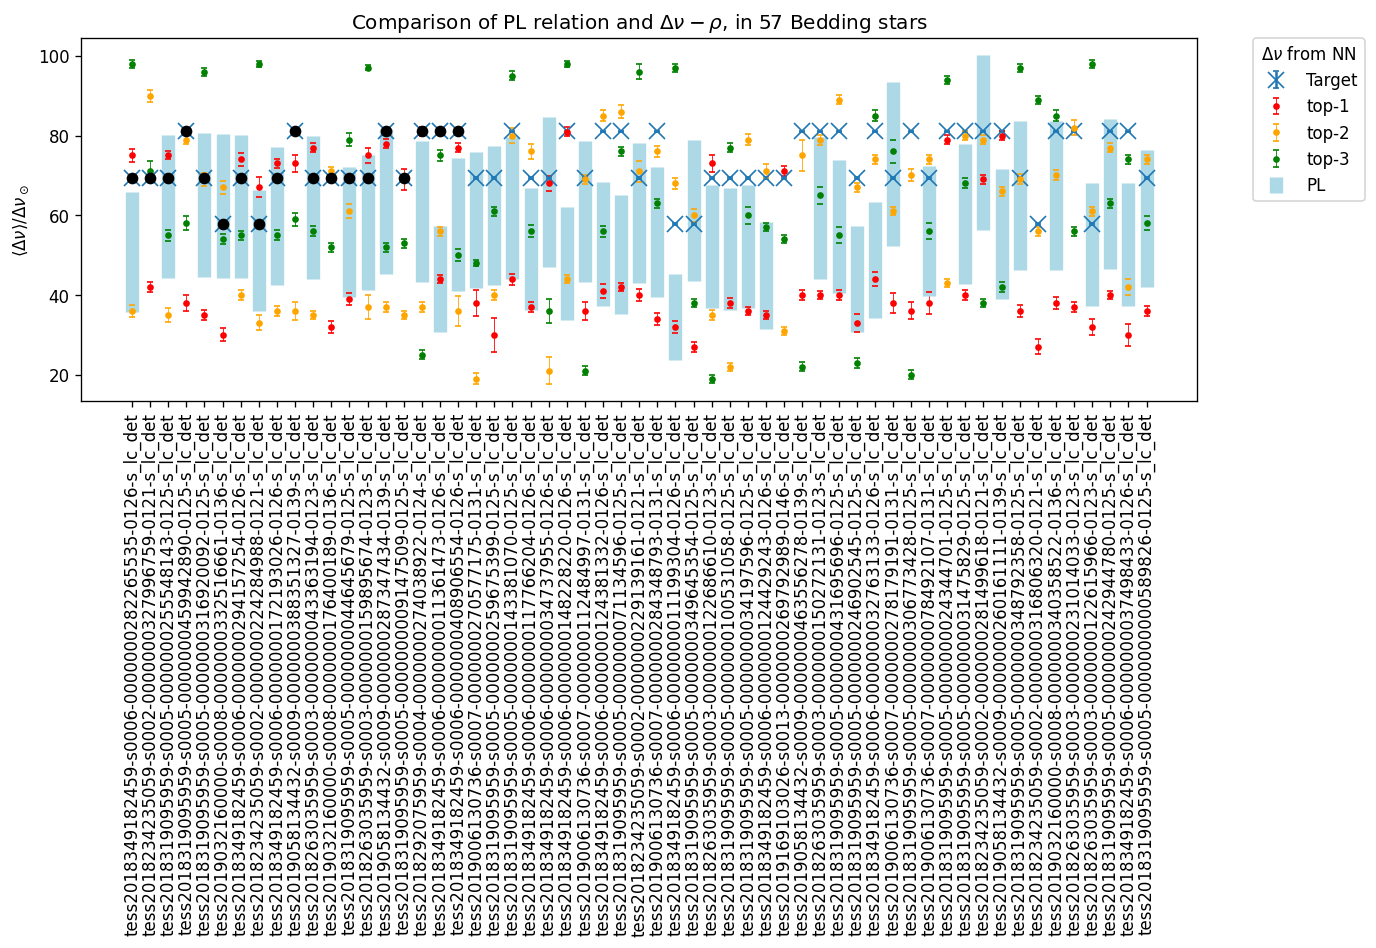

57


In [33]:
plt.subplots(1, figsize=(12, 4), dpi=120)
    
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])

for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], targets[i], color="black", zorder=1000)
        
        
plt.errorbar(
    df["id"],
    df["dnu-target"],
    0.23,
    fmt="x",
    markersize=10,
    capsize=2,
    label="Target"
)

plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)

        
plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
#plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 57 Bedding stars")
#plt.ylim(0, 1.0)
plt.show()
print(len(df.index))

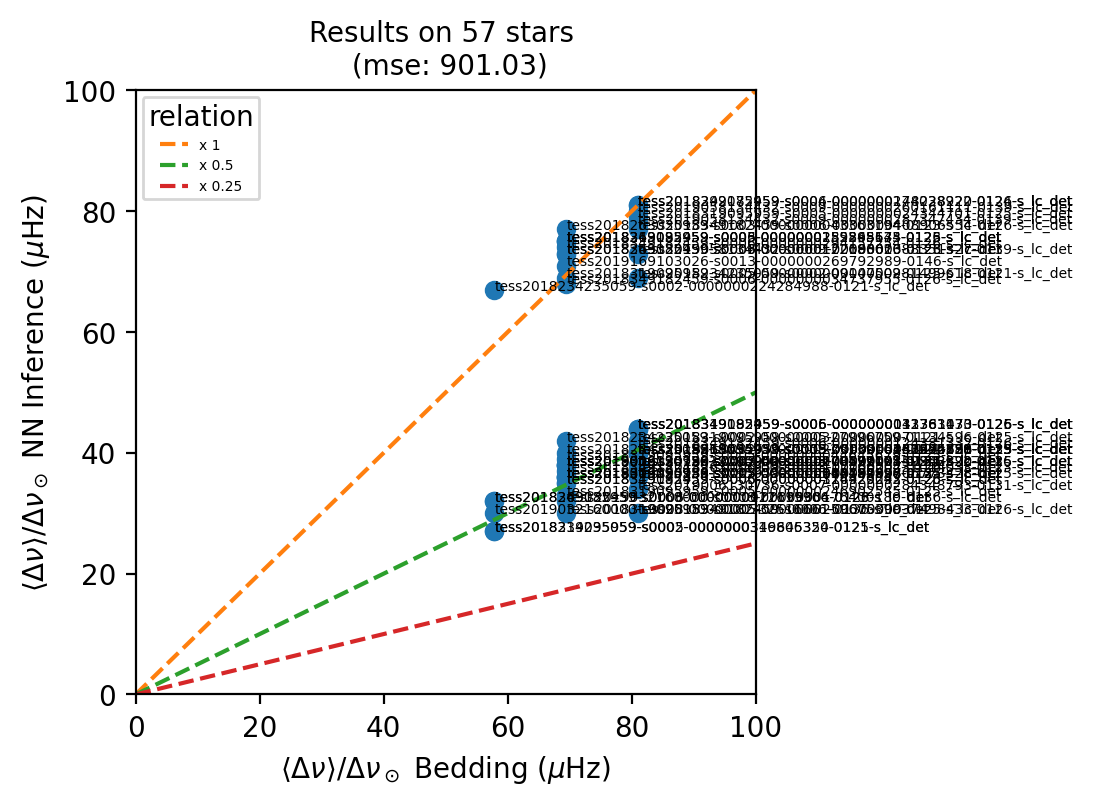

In [34]:
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])
    
# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o") # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ Bedding ($\mu$Hz)")
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ NN Inference ($\mu$Hz)")
plt.title("Results on 57 stars \n (mse: %s)" % np.round(np.mean(np.power(np.asarray(targets)-np.asarray(inferences), 2)),2), fontsize=10)
plt.show()

In [35]:
# Are radial modes fit with NN ?

sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
np.count_nonzero(sign)

vals = np.asarray(targets, dtype=float)[sign==True] 

df[sign==True]


"""

HD 20232 : tess2018263035959-s0003-0000000159895674-0123 : SI [no hay Luminosidad disponible]
HD 24975 : tess2018319095959-s0005-0000000044645679-0125 : NO
HD 25248 : tess2018319095959-s0005-0000000459942890-0125 : NO [no hay Luminosidad disponible]
HD 25369 : tess2018319095959-s0005-0000000009147509-0125 : SI [no hay Luminosidad disponible]
HD 31901 : tess2018319095959-s0005-0000000316920092-0125 : NO (SI con L)
HD 20203 : tess2018292075959-s0004-0000000274038922-0124 : SI
HD 40317 : tess2018349182459-s0006-0000000282265535-0126 : SI
HD 42005 : tess2018349182459-s0006-0000000408906554-0126 : SI
HD 44958 : tess2018319095959-s0005-0000000255548143-0125 : SI
HD 46722 : tess2018349182459-s0006-0000000172193026-0126 : SI
HD 55863 : tess2018349182459-s0006-0000000294157254-0126 : SI
HD 99506 : tess2019058134432-s0009-0000000287347434-0139 : SI
HD 290799: tess2018349182459-s0006-0000000011361473-0126 : NO [Valor de Bedding fuera de ventana L]
-----------------------------------------------------------------------------------------------
> HD 187547 : KIC7548479 ???
HD 70510 : tess2019058134432-s0009-0000000388351327-0139 : SI
HD 75040 : tess2019032160000-s0008-0000000176400189-0136 : NO [no hay Luminosidad disponible]
HD 3622  : tess2018263035959-s0003-0000000043363194-0123 : SI
HD 220811: tess2018234235059-s0002-0000000327996759-0121 : NO [no hay Luminosidad disponible]
HD 223011: tess2018234235059-s0002-0000000224284988-0121 : SI
HD 78198: tess2019032160000-s0008-0000000332516661-0136 :  NO (SI con L)

Totales:
12(si)/19(total) = 63%
14(si)/19(total) = 73%

Solo las identificadas:
9(si) /13(total)  = 69%
10(si)/13(total) = 76%


>(no) HD 32433 : tess2018319095959-s0005-0000000348792358-0125 : NO (SI con L)
"""

'\n\nHD 20232 : tess2018263035959-s0003-0000000159895674-0123 : SI [no hay Luminosidad disponible]\nHD 24975 : tess2018319095959-s0005-0000000044645679-0125 : NO\nHD 25248 : tess2018319095959-s0005-0000000459942890-0125 : NO [no hay Luminosidad disponible]\nHD 25369 : tess2018319095959-s0005-0000000009147509-0125 : SI [no hay Luminosidad disponible]\nHD 31901 : tess2018319095959-s0005-0000000316920092-0125 : NO (SI con L)\nHD 20203 : tess2018292075959-s0004-0000000274038922-0124 : SI\nHD 40317 : tess2018349182459-s0006-0000000282265535-0126 : SI\nHD 42005 : tess2018349182459-s0006-0000000408906554-0126 : SI\nHD 44958 : tess2018319095959-s0005-0000000255548143-0125 : SI\nHD 46722 : tess2018349182459-s0006-0000000172193026-0126 : SI\nHD 55863 : tess2018349182459-s0006-0000000294157254-0126 : SI\nHD 99506 : tess2019058134432-s0009-0000000287347434-0139 : SI\nHD 290799: tess2018349182459-s0006-0000000011361473-0126 : NO [Valor de Bedding fuera de ventana L]\n-------------------------------

In [36]:
results_bedding= pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "e-dnu-target",
        "dnu-from-P",
        "e-dnu-from-P",
        "best-top",
        "e-best-top",
        "ktop",
    ]
)

for index, row in df.iterrows():
    print("Proccessing star %s" % row["id"])
    print("PL[%f,%f]" % (row["dnu-from-P-up"], row["dnu-from-P-down"]))
    # Top index to search on 
    top_indexs = ["top1", "top2", "top3"]
    best = np.nan # empty on start
    # Center of PL window
    central_pl_window = row["dnu-from-P-up"]-((row["dnu-from-P-up"]-row["dnu-from-P-down"])/2)
    # Check predictions indise L window
    inside_pl_window = []
    for top_index in top_indexs:
        flag_full_inside = (row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"]) & (row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
        flag_partial =  ((row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"]) & (row[top_index] - row["e-%s" % (top_index)] <= row["dnu-from-P-up"])) | ((row[top_index] + row["e-%s" % (top_index)] >= row["dnu-from-P-down"]) & (row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"])) 
        if flag_full_inside or flag_partial:
            inside_pl_window.append(top_index)
    print("   =>Inside PL window: %s" % inside_pl_window)

    if (len(inside_pl_window) > 0) and (not np.isnan(row["dnu-from-P-up"])):
        print("=>",inside_pl_window)
        top_index = inside_pl_window[0] # Get most probable from NN
        
        # Get best
        best = row["%s" % (top_index)]
        results_bedding.loc[len(results_bedding)] = [
                        row["id"],
                        row["dnu-target"],
                        0.23,
                        (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
                        row["dnu-from-P-up"] - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
                        best,
                        row["e-%s" % top_index],
                        top_index
                    ]
    else:
        # Get closest inference to the center of PL window
        top_index = np.argmin([np.abs(row[top_index]-central_pl_window) for top_index in top_indexs])
        # Check if predictions is not inside window
        # Get best
        best = row["top%s" % (top_index+1)]
        results_bedding.loc[len(results_bedding)] = [
                        row["id"],
                        row["dnu-target"],
                        0.23,
                        (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
                        row["dnu-from-P-up"] - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
                        best,
                        row["e-top%s" % (top_index+1)],
                        top_index
                    ]

Proccessing star tess2019006130736-s0007-0000000270577175-0131-s_lc_det
PL[75.950268,41.746110]
   =>Inside PL window: ['top3']
=> ['top3']
Proccessing star tess2018349182459-s0006-0000000282265535-0126-s_lc_det
PL[65.960827,35.829308]
   =>Inside PL window: ['top2']
=> ['top2']
Proccessing star tess2018234235059-s0002-0000000327996759-0121-s_lc_det
PL[nan,nan]
   =>Inside PL window: []
Proccessing star tess2018319095959-s0005-0000000259675399-0125-s_lc_det
PL[77.361676,42.584862]
   =>Inside PL window: ['top3']
=> ['top3']
Proccessing star tess2018319095959-s0005-0000000143381070-0125-s_lc_det
PL[79.676399,43.961684]
   =>Inside PL window: ['top1', 'top2']
=> ['top1', 'top2']
Proccessing star tess2018349182459-s0006-0000000117766204-0126-s_lc_det
PL[66.729931,36.283477]
   =>Inside PL window: ['top1', 'top3']
=> ['top1', 'top3']
Proccessing star tess2018349182459-s0006-0000000034737955-0126-s_lc_det
PL[84.666103,46.934426]
   =>Inside PL window: ['top1']
=> ['top1']
Proccessing star t

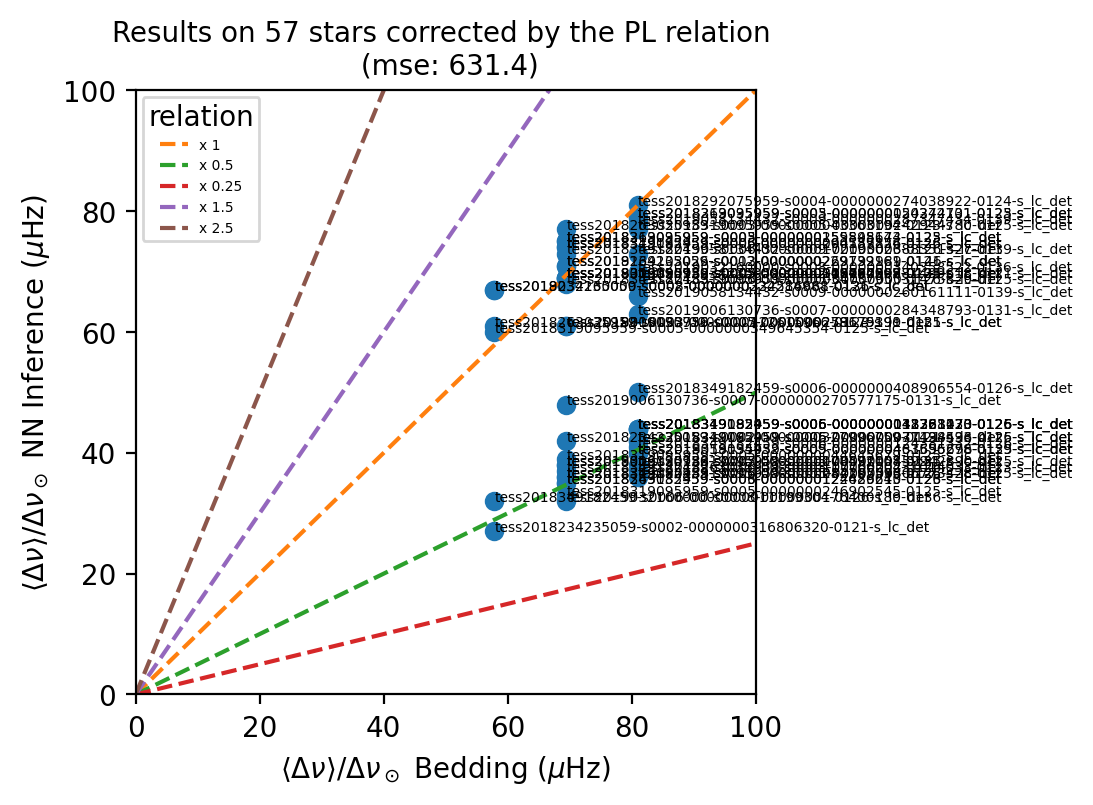

In [37]:
#### Prepare data plot
targets = results_bedding["dnu-target"]
inferences = results_bedding["best-top"]
ids = results_bedding["id"]

# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o") # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
abline(1.5, 0)
abline(2.5, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ Bedding ($\mu$Hz)")
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ NN Inference ($\mu$Hz)")
plt.title("Results on 57 stars corrected by the PL relation \n (mse: %s)" % np.round(np.mean(np.power(np.asarray(targets)-np.asarray(inferences), 2)),2), fontsize=10)
plt.show()

In [38]:
# Get inferenes "close" to targets and create a True/Flase flag
sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
vals = np.asarray(targets, dtype=float)[sign==True] 

# Get stars in stars_fundamental_mode list mode
list_stars_in_fundamental_model = [(i, i in stars_fundamental_mode) for i in df[sign]["id"].values]
import pprint
print(pprint.pformat(list_stars_in_fundamental_model))

# Get percentage
print("Percentage of stars radial mode in NN inference: %f" % (sum([i in stars_fundamental_mode for i in df[sign]["id"].values]) / len(stars_fundamental_mode)))

[('tess2018319095959-s0005-0000000259675399-0125-s_lc_det', False),
 ('tess2018349182459-s0006-0000000034737955-0126-s_lc_det', False),
 ('tess2018319095959-s0005-0000000255548143-0125-s_lc_det', True),
 ('tess2019006130736-s0007-0000000112484997-0131-s_lc_det', False),
 ('tess2018234235059-s0002-0000000229139161-0121-s_lc_det', False),
 ('tess2018319095959-s0005-0000000316920092-0125-s_lc_det', True),
 ('tess2019032160000-s0008-0000000332516661-0136-s_lc_det', True),
 ('tess2018349182459-s0006-0000000294157254-0126-s_lc_det', True),
 ('tess2018319095959-s0005-0000000349645354-0125-s_lc_det', False),
 ('tess2018234235059-s0002-0000000224284988-0121-s_lc_det', True),
 ('tess2018349182459-s0006-0000000172193026-0126-s_lc_det', True),
 ('tess2019169103026-s0013-0000000269792989-0146-s_lc_det', False),
 ('tess2018263035959-s0003-0000000150272131-0123-s_lc_det', False),
 ('tess2019058134432-s0009-0000000388351327-0139-s_lc_det', True),
 ('tess2018263035959-s0003-0000000043363194-0123-s_lc_d

In [39]:
sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
np.count_nonzero(sign)

vals = np.asarray(targets, dtype=float)[sign==True] 

df[sign==True]

id  dnu-target top1  \
3   tess2018319095959-s0005-0000000259675399-0125-...   69.444444   30   
6   tess2018349182459-s0006-0000000034737955-0126-...   69.444444   68   
7   tess2018319095959-s0005-0000000255548143-0125-...   69.444444   75   
9   tess2019006130736-s0007-0000000112484997-0131-...   69.444444   36   
12  tess2018234235059-s0002-0000000229139161-0121-...   69.444444   40   
15  tess2018319095959-s0005-0000000316920092-0125-...   69.444444   35   
17  tess2019032160000-s0008-0000000332516661-0136-...   57.870370   30   
18  tess2018349182459-s0006-0000000294157254-0126-...   69.444444   74   
19  tess2018319095959-s0005-0000000349645354-0125-...   57.870370   27   
21  tess2018234235059-s0002-0000000224284988-0121-...   57.870370   67   
22  tess2018349182459-s0006-0000000172193026-0126-...   69.444444   73   
26  tess2019169103026-s0013-0000000269792989-0146-...   69.444444   71   
28  tess2018263035959-s0003-0000000150272131-0123-...   81.018519   40   
30  tess2019058134432-s0009-0000000388351327-0139-...   81.018519   73   
33  tess2018263035959-s0003-0000000043363194-0123-...   69.444444   77   
36  tess2019006130736-s0007-0000000278179191-0131-...   69.444444   38   
39  tess2018263035959-s0003-0000000159895674-0123-...   69.444444   75   
40  tess2018319095959-s0005-0000000024344701-0125-...   81.018519   79   
41  tess2019058134432-s0009-0000000287347434-0139-...   81.018519   78   
44  tess2018319095959-s0005-0000000009147509-0125-...   69.444444   69   
46  tess2018319095959-s0005-0000000348792358-0125-...   69.444444   36   
48  tess2018292075959-s0004-0000000274038922-0124-...   81.018519   81   
52  tess2018263035959-s0003-0000000122615966-0123-...   57.870370   32   
53  tess2018319095959-s0005-0000000242944780-0125-...   81.018519   40   
56  tess2018319095959-s0005-0000000000589826-0125-...   69.444444   36   

      e-top1 top2    e-top2 top3    e-top3 top4    e-top4  \
3   4.236293   40  1.163036   61  1.074599   71  1.257952   
6   1.958508   21  3.420865   36  2.981769   50  1.271554   
7   1.004229   35  1.787321   55  1.411078   90  1.121688   
9   2.209089   69  1.172194   21  1.186692   95  0.955620   
12  1.419688   71  2.621109   96  1.884200   20  2.795562   
15  1.220290   69  1.579554   96  1.060360   54  2.088074   
17  1.599047   67  1.567963   54  1.290611   43  2.647982   
18  1.685528   40  1.250194   55  1.133270   89  1.050565   
19  1.230694   60  1.614049   38  0.957913   95  1.052234   
21  2.499134   33  1.859342   98  0.776869   44  1.060025   
22  1.028675   36  1.175884   55  1.297886   95  0.569002   
26  1.262247   31  1.067596   54  1.074314   20  1.462074   
28  1.021932   79  1.254240   65  2.107169   54  1.198524   
30  2.227243   36  2.260625   59  1.567218   25  1.685216   
33  1.180074   35  1.051584   56  1.271015   95  1.188352   
36  2.534777   61  1.014434   76  2.832986   21  1.270569   
39  1.968248   37  2.914482   97  0.658845   19  1.758654   
40  1.043326   43  1.021916   94  1.049515   67  1.744769   
41  1.100667   37  1.300252   52  1.098796   65  0.956583   
44  2.681214   35  1.072096   53  1.132347   22  1.995597   
46  1.447211   69  1.249618   97  0.965526   80  1.129024   
48  1.032950   37  1.343976   25  1.095920   67  1.278432   
52  1.970273   61  1.072921   98  1.040089   76  1.247998   
53  1.081245   77  1.093182   63  1.130061   51  1.112349   
56  1.190560   74  1.140826   58  1.795380   21  1.505817   

    dnu-from-P-up-fromstarmodel  dnu-from-P-down-fromstarmodel  dnu-from-P-up  \
3                     67.514748                      36.747185      77.361676   
6                     84.437877                      46.798323      84.666103   
7                     80.526145                      44.467495      80.068831   
9                     72.031127                      39.420439      78.528288   
12                    75.705930                      41.600971      78.093221   
15                    72.861387                      